In [24]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from tabulate import tabulate

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [25]:
df_train = pd.read_csv('datasets/train_data_features.csv')
df_test = pd.read_csv('datasets/test_data_features.csv')
df = pd.read_csv('datasets/train.csv')

In [26]:
df_train['category'] = df['Category']
df_test = df_test.drop(columns='id')

In [27]:
df_test

longitude   latitude  year  month  day  hour  minute  Rainy  Spring  \
0      -122.399588  37.735051  2015      5   10    23      59      0       0   
1      -122.391523  37.732432  2015      5   10    23      51      0       0   
2      -122.426002  37.792212  2015      5   10    23      50      0       0   
3      -122.437394  37.721412  2015      5   10    23      45      0       0   
4      -122.437394  37.721412  2015      5   10    23      45      0       0   
...            ...        ...   ...    ...  ...   ...     ...    ...     ...   
884257 -122.408983  37.751987  2003      1    1     0       1      0       1   
884258 -122.425342  37.792681  2003      1    1     0       1      0       1   
884259 -122.445418  37.712075  2003      1    1     0       1      0       1   
884260 -122.387394  37.739479  2003      1    1     0       1      0       1   
884261 -122.489714  37.733950  2003      1    1     0       1      0       1   

        Summer  Winter  Evening  Mid-Night  Morning  Night  Noon  /  Al  Av  \
0            1       0        0          1        0      0     0  0   0   1   
1            1       0        0          1        0      0     0  0   0   0   
2            1       0        0          1        0      0     0  0   0   0   
3            1       0        0          1        0      0     0  0   0   0   
4            1       0        0          1        0      0     0  0   0   0   
...        ...     ...      ...        ...      ...    ...   ... ..  ..  ..   
884257       0       0        0          1        0      0     0  0   0   0   
884258       0       0        0          1        0      0     0  0   0   0   
884259       0       0        0          1        0      0     0  0   0   0   
884260       0       0        0          1        0      0     0  0   0   1   
884261       0       0        0          1        0      0     0  0   0   0   

        Bl  Cr  Cross  Ct  Dr  Ex  Hwy  Hy  I-80  Ln  Mar  Palms  Park  Pl  \
0        0   0      0   0   0   0    0   0     0   0    0      0     0   0   
1        0   0      1   0   0   0    0   0     0   0    0      0     0   0   
2        0   0      0   0   0   0    0   0     0   0    0      0     0   0   
3        0   0      0   0   0   0    0   0     0   0    0      0     0   0   
4        0   0      0   0   0   0    0   0     0   0    0      0     0   0   
...     ..  ..    ...  ..  ..  ..  ...  ..   ...  ..  ...    ...   ...  ..   
884257   0   0      0   0   0   0    0   0     0   0    0      0     0   0   
884258   0   0      0   0   0   0    0   0     0   0    0      0     0   0   
884259   0   0      0   0   0   0    0   0     0   0    0      0     0   0   
884260   0   0      0   0   0   0    0   0     0   0    0      0     0   0   
884261   1   0      0   0   0   0    0   0     0   0    0      0     0   0   

        Pz  Rd  Rw  St  Stwy  Ter  Tr  Way  Wk  Wy  Bayview  Central  \
0        0   0   0   0     0    0   0    0   0   0        1        0   
1        0   0   0   0     0    0   0    0   0   0        1        0   
2        0   0   0   1     0    0   0    0   0   0        0        0   
3        0   0   0   1     0    0   0    0   0   0        0        0   
4        0   0   0   1     0    0   0    0   0   0        0        0   
...     ..  ..  ..  ..   ...  ...  ..  ...  ..  ..      ...      ...   
884257   0   0   0   1     0    0   0    0   0   0        0        0   
884258   0   0   0   1     0    0   0    0   0   0        0        0   
884259   0   0   0   1     0    0   0    0   0   0        0        0   
884260   0   0   0   0     0    0   0    0   0   0        1        0   
884261   0   0   0   0     0    0   0    0   0   0        0        0   

        Ingleside  Mission  Northern  Park.1  Richmond  Southern  Taraval  \
0               0        0         0       0         0         0        0   
1               0        0         0       0         0         0        0   
2               0        0         1       0         0         0  

In [28]:
#df_train['FERLINGHETTI']

In [29]:
df_train

longitude   latitude  year  month  day  hour  minute  Rainy  Spring  \
0      -122.425892  37.774599  2015      5   13    23      53      0       0   
1      -122.425892  37.774599  2015      5   13    23      53      0       0   
2      -122.424363  37.800414  2015      5   13    23      33      0       0   
3      -122.426995  37.800873  2015      5   13    23      30      0       0   
4      -122.438738  37.771541  2015      5   13    23      30      0       0   
...            ...        ...   ...    ...  ...   ...     ...    ...     ...   
878044 -122.459033  37.714056  2003      1    6     0      15      0       1   
878045 -122.447364  37.731948  2003      1    6     0       1      0       1   
878046 -122.403390  37.780266  2003      1    6     0       1      0       1   
878047 -122.390531  37.780607  2003      1    6     0       1      0       1   
878048 -122.394926  37.738212  2003      1    6     0       1      0       1   

        Summer  Winter  Evening  Mid-Night  Morning  Night  Noon  /  Al  Av  \
0            1       0        0          1        0      0     0  0   0   0   
1            1       0        0          1        0      0     0  0   0   0   
2            1       0        0          1        0      0     0  0   0   0   
3            1       0        0          1        0      0     0  0   0   0   
4            1       0        0          1        0      0     0  0   0   0   
...        ...     ...      ...        ...      ...    ...   ... ..  ..  ..   
878044       0       0        0          1        0      0     0  0   0   0   
878045       0       0        0          1        0      0     0  0   0   0   
878046       0       0        0          1        0      0     0  0   0   0   
878047       0       0        0          1        0      0     0  0   0   0   
878048       0       0        0          1        0      0     0  0   0   1   

        Bl  Bufano  Cr  Cross  Ct  Dr  Ex  Ferlinghetti  Hwy  Hy  I-80  Ln  \
0        0       0   0      1   0   0   0             0    0   0     0   0   
1        0       0   0      1   0   0   0             0    0   0     0   0   
2        0       0   0      1   0   0   0             0    0   0     0   0   
3        0       0   0      0   0   0   0             0    0   0     0   0   
4        0       0   0      0   0   0   0             0    0   0     0   0   
...     ..     ...  ..    ...  ..  ..  ..           ...  ...  ..   ...  ..   
878044   0       0   0      1   0   0   0             0    0   0     0   0   
878045   0       0   0      0   0   0   0             0    0   0     0   0   
878046   0       0   0      1   0   0   0             0    0   0     0   0   
878047   0       0   0      1   0   0   0             0    0   0     0   0   
878048   0       0   0      0   0   0   0             0    0   0     0   0   

        Mar  Palms  Park  Pl  Pz  Rd  Rw  St  Stwy  Ter  Tr  Way  Wk  Wy  \
0         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
1         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
2         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
3         0      0     0   0   0   0   0   1     0    0   0    0   0   0   
4         0      0     0   0   0   0   0   1     0    0   0    0   0   0   
...     ...    ...   ...  ..  ..  ..  ..  ..   ...  ...  ..  ...  ..  ..   
878044    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878045    0      0     0   0   0   0   0   1     0    0   0    0   0   0   
878046    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878047    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878048    0      0     0   0   0   0   0   0     0    0   0    0   0   0   

        Bayview  Central  Ingleside  Mission  Northern  Park.1  Richmond  \
0             0        0          0        0         1       0         0   
1             0        0          0        0         1       0         0   
2             0      

In [30]:
df_train.rename(columns={'Park.1': 'Park'}, inplace=True)

In [32]:
df_train.shape

(878049, 113)

In [33]:
df_test.shape

(884262, 110)

Data Split

In [34]:
data = df_train

In [35]:
X = data.drop(columns='category')
y = data['category']

In [36]:
X

longitude   latitude  year  month  day  hour  minute  Rainy  Spring  \
0      -122.425892  37.774599  2015      5   13    23      53      0       0   
1      -122.425892  37.774599  2015      5   13    23      53      0       0   
2      -122.424363  37.800414  2015      5   13    23      33      0       0   
3      -122.426995  37.800873  2015      5   13    23      30      0       0   
4      -122.438738  37.771541  2015      5   13    23      30      0       0   
...            ...        ...   ...    ...  ...   ...     ...    ...     ...   
878044 -122.459033  37.714056  2003      1    6     0      15      0       1   
878045 -122.447364  37.731948  2003      1    6     0       1      0       1   
878046 -122.403390  37.780266  2003      1    6     0       1      0       1   
878047 -122.390531  37.780607  2003      1    6     0       1      0       1   
878048 -122.394926  37.738212  2003      1    6     0       1      0       1   

        Summer  Winter  Evening  Mid-Night  Morning  Night  Noon  /  Al  Av  \
0            1       0        0          1        0      0     0  0   0   0   
1            1       0        0          1        0      0     0  0   0   0   
2            1       0        0          1        0      0     0  0   0   0   
3            1       0        0          1        0      0     0  0   0   0   
4            1       0        0          1        0      0     0  0   0   0   
...        ...     ...      ...        ...      ...    ...   ... ..  ..  ..   
878044       0       0        0          1        0      0     0  0   0   0   
878045       0       0        0          1        0      0     0  0   0   0   
878046       0       0        0          1        0      0     0  0   0   0   
878047       0       0        0          1        0      0     0  0   0   0   
878048       0       0        0          1        0      0     0  0   0   1   

        Bl  Bufano  Cr  Cross  Ct  Dr  Ex  Ferlinghetti  Hwy  Hy  I-80  Ln  \
0        0       0   0      1   0   0   0             0    0   0     0   0   
1        0       0   0      1   0   0   0             0    0   0     0   0   
2        0       0   0      1   0   0   0             0    0   0     0   0   
3        0       0   0      0   0   0   0             0    0   0     0   0   
4        0       0   0      0   0   0   0             0    0   0     0   0   
...     ..     ...  ..    ...  ..  ..  ..           ...  ...  ..   ...  ..   
878044   0       0   0      1   0   0   0             0    0   0     0   0   
878045   0       0   0      0   0   0   0             0    0   0     0   0   
878046   0       0   0      1   0   0   0             0    0   0     0   0   
878047   0       0   0      1   0   0   0             0    0   0     0   0   
878048   0       0   0      0   0   0   0             0    0   0     0   0   

        Mar  Palms  Park  Pl  Pz  Rd  Rw  St  Stwy  Ter  Tr  Way  Wk  Wy  \
0         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
1         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
2         0      0     0   0   0   0   0   0     0    0   0    0   0   0   
3         0      0     0   0   0   0   0   1     0    0   0    0   0   0   
4         0      0     0   0   0   0   0   1     0    0   0    0   0   0   
...     ...    ...   ...  ..  ..  ..  ..  ..   ...  ...  ..  ...  ..  ..   
878044    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878045    0      0     0   0   0   0   0   1     0    0   0    0   0   0   
878046    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878047    0      0     0   0   0   0   0   0     0    0   0    0   0   0   
878048    0      0     0   0   0   0   0   0     0    0   0    0   0   0   

        Bayview  Central  Ingleside  Mission  Northern  Park  Richmond  \
0             0        0          0        0         1     0         0   
1             0        0          0        0         1     0         0   
2             0        0   

In [37]:
pd.set_option('display.max_columns', 200)

In [38]:
print(X)

         longitude   latitude  year  month  day  hour  minute  Rainy  Spring  \
0      -122.425892  37.774599  2015      5   13    23      53      0       0   
1      -122.425892  37.774599  2015      5   13    23      53      0       0   
2      -122.424363  37.800414  2015      5   13    23      33      0       0   
3      -122.426995  37.800873  2015      5   13    23      30      0       0   
4      -122.438738  37.771541  2015      5   13    23      30      0       0   
...            ...        ...   ...    ...  ...   ...     ...    ...     ...   
878044 -122.459033  37.714056  2003      1    6     0      15      0       1   
878045 -122.447364  37.731948  2003      1    6     0       1      0       1   
878046 -122.403390  37.780266  2003      1    6     0       1      0       1   
878047 -122.390531  37.780607  2003      1    6     0       1      0       1   
878048 -122.394926  37.738212  2003      1    6     0       1      0       1   

        Summer  Winter  Evening  Mid-Ni

In [41]:
y

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: category, Length: 878049, dtype: object

Data Preprocessing

In [42]:
#Using Standard Scaler to preprocess data
def data_preprocess(X):
    if not os.path.isfile(path='models/scaler.pkl'):
        X.columns = X.columns.astype(str)
        scaler = StandardScaler()
        scaler.fit(X)
        pickle.dump(scaler,open('models/scaler.pkl','wb'))
    else:
        print('Model already exists')
        scaler = pickle.load(open('models/scaler.pkl','rb'))
        
    X = scaler.transform(X)
    return X

In [43]:
X_normalized = data_preprocess(X)

Model already exists


In [44]:
X_normalized

array([[-0.10790218,  0.00783181,  1.7316503 , ..., -0.07430663,
         1.20230501, -0.14561492],
       [-0.10790218,  0.00783181,  1.7316503 , ..., -0.07430663,
         1.20230501, -0.14561492],
       [-0.05754066,  0.06433461,  1.7316503 , ..., -0.07430663,
        -0.1597951 , -0.14561492],
       ...,
       [ 0.63340383,  0.02023512, -1.57304985, ..., -0.07430663,
         1.62056804, -0.14561492],
       [ 1.05704249,  0.02098256, -1.57304985, ..., -0.07430663,
         1.09993886, -0.14561492],
       [ 0.91227164, -0.07180843, -1.57304985, ..., -0.07430663,
        -1.52677135, -0.14561492]])

Splitting Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify=y, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20)

In [46]:
len(y_train.value_counts()), len(y_valid.value_counts()), len(y_test.value_counts())

(39, 39, 39)

In [47]:
X_train.shape, X_test.shape, X_valid.shape

((561951, 112), (175610, 112), (140488, 112))

Confusion Matrix Labels (class values)

In [48]:
labels = [
    'ARSON',
    'ASSAULT',
    'BAD CHECKS',
    'BRIBERY',
    'BURGLARY',
    'DISORDERLY CONDUCT',
    'DRIVING UNDER THE INFLUENCE',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'EMBEZZLEMENT',
    'EXTORTION',
    'FAMILY OFFENSES',
    'FORGERY/COUNTERFEITING',
    'FRAUD',
    'GAMBLING',
    'KIDNAPPING',
    'LARCENY/THEFT',
    'LIQUOR LAWS',
    'LOITERING',
    'MISSING PERSON',
    'NON-CRIMINAL',
    'OTHER OFFENSES',
    'PORNOGRAPHY/OBSCENE MAT',
    'PROSTITUTION',
    'RECOVERED VEHICLE',
    'ROBBERY',
    'RUNAWAY',
    'SECONDARY CODES',
    'SEX OFFENSES FORCIBLE',
    'SEX OFFENSES NON FORCIBLE',
    'STOLEN PROPERTY',
    'SUICIDE',
    'SUSPICIOUS OCC',
    'TREA',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WARRANTS',
    'WEAPON LAWS'
 ]

Creating Confusion, Recall and Precision Matrices

In [49]:
def plot_heatmap(matrix, title, labels, cmap='YlGnBu'):
    plt.figure(figsize=(25, 20))
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return None

def plot_confusion_matrix(y_actuals, y_preds, labels=labels):
    # confusion matrix
    cmat = confusion_matrix(y_true=y_actuals, y_pred=y_preds)
    # precision matrix
    pmat = cmat / cmat.sum(axis=0)
    # recall matrix
    rmat = cmat / cmat.sum(axis=1)
    # class labels
    
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    
    return None

In [50]:
def dummy_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):
    model_path = 'models/'
    model_name = 'dummy_classifier.pkl'

    if not os.path.isfile(path=model_path + model_name):
        clf = DummyClassifier(strategy='uniform')
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
        sig_clf.fit(X_train, y_train)
        
        pickle.dump(sig_clf, open(model_path + model_name, 'wb'))
    else:
        print('Model already exists.')
        sig_clf = pickle.load(open(model_path + model_name, 'rb'))

    y_train_preds = sig_clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = sig_clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = sig_clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = sig_clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)
    
    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)
    
    return train_log_loss, valid_log_loss, test_log_loss

Model already exists.
Training Log Loss: 2.680331191600582
Validation Log Loss: 2.680340527321129
Testing Log Loss: 2.6803028841269736


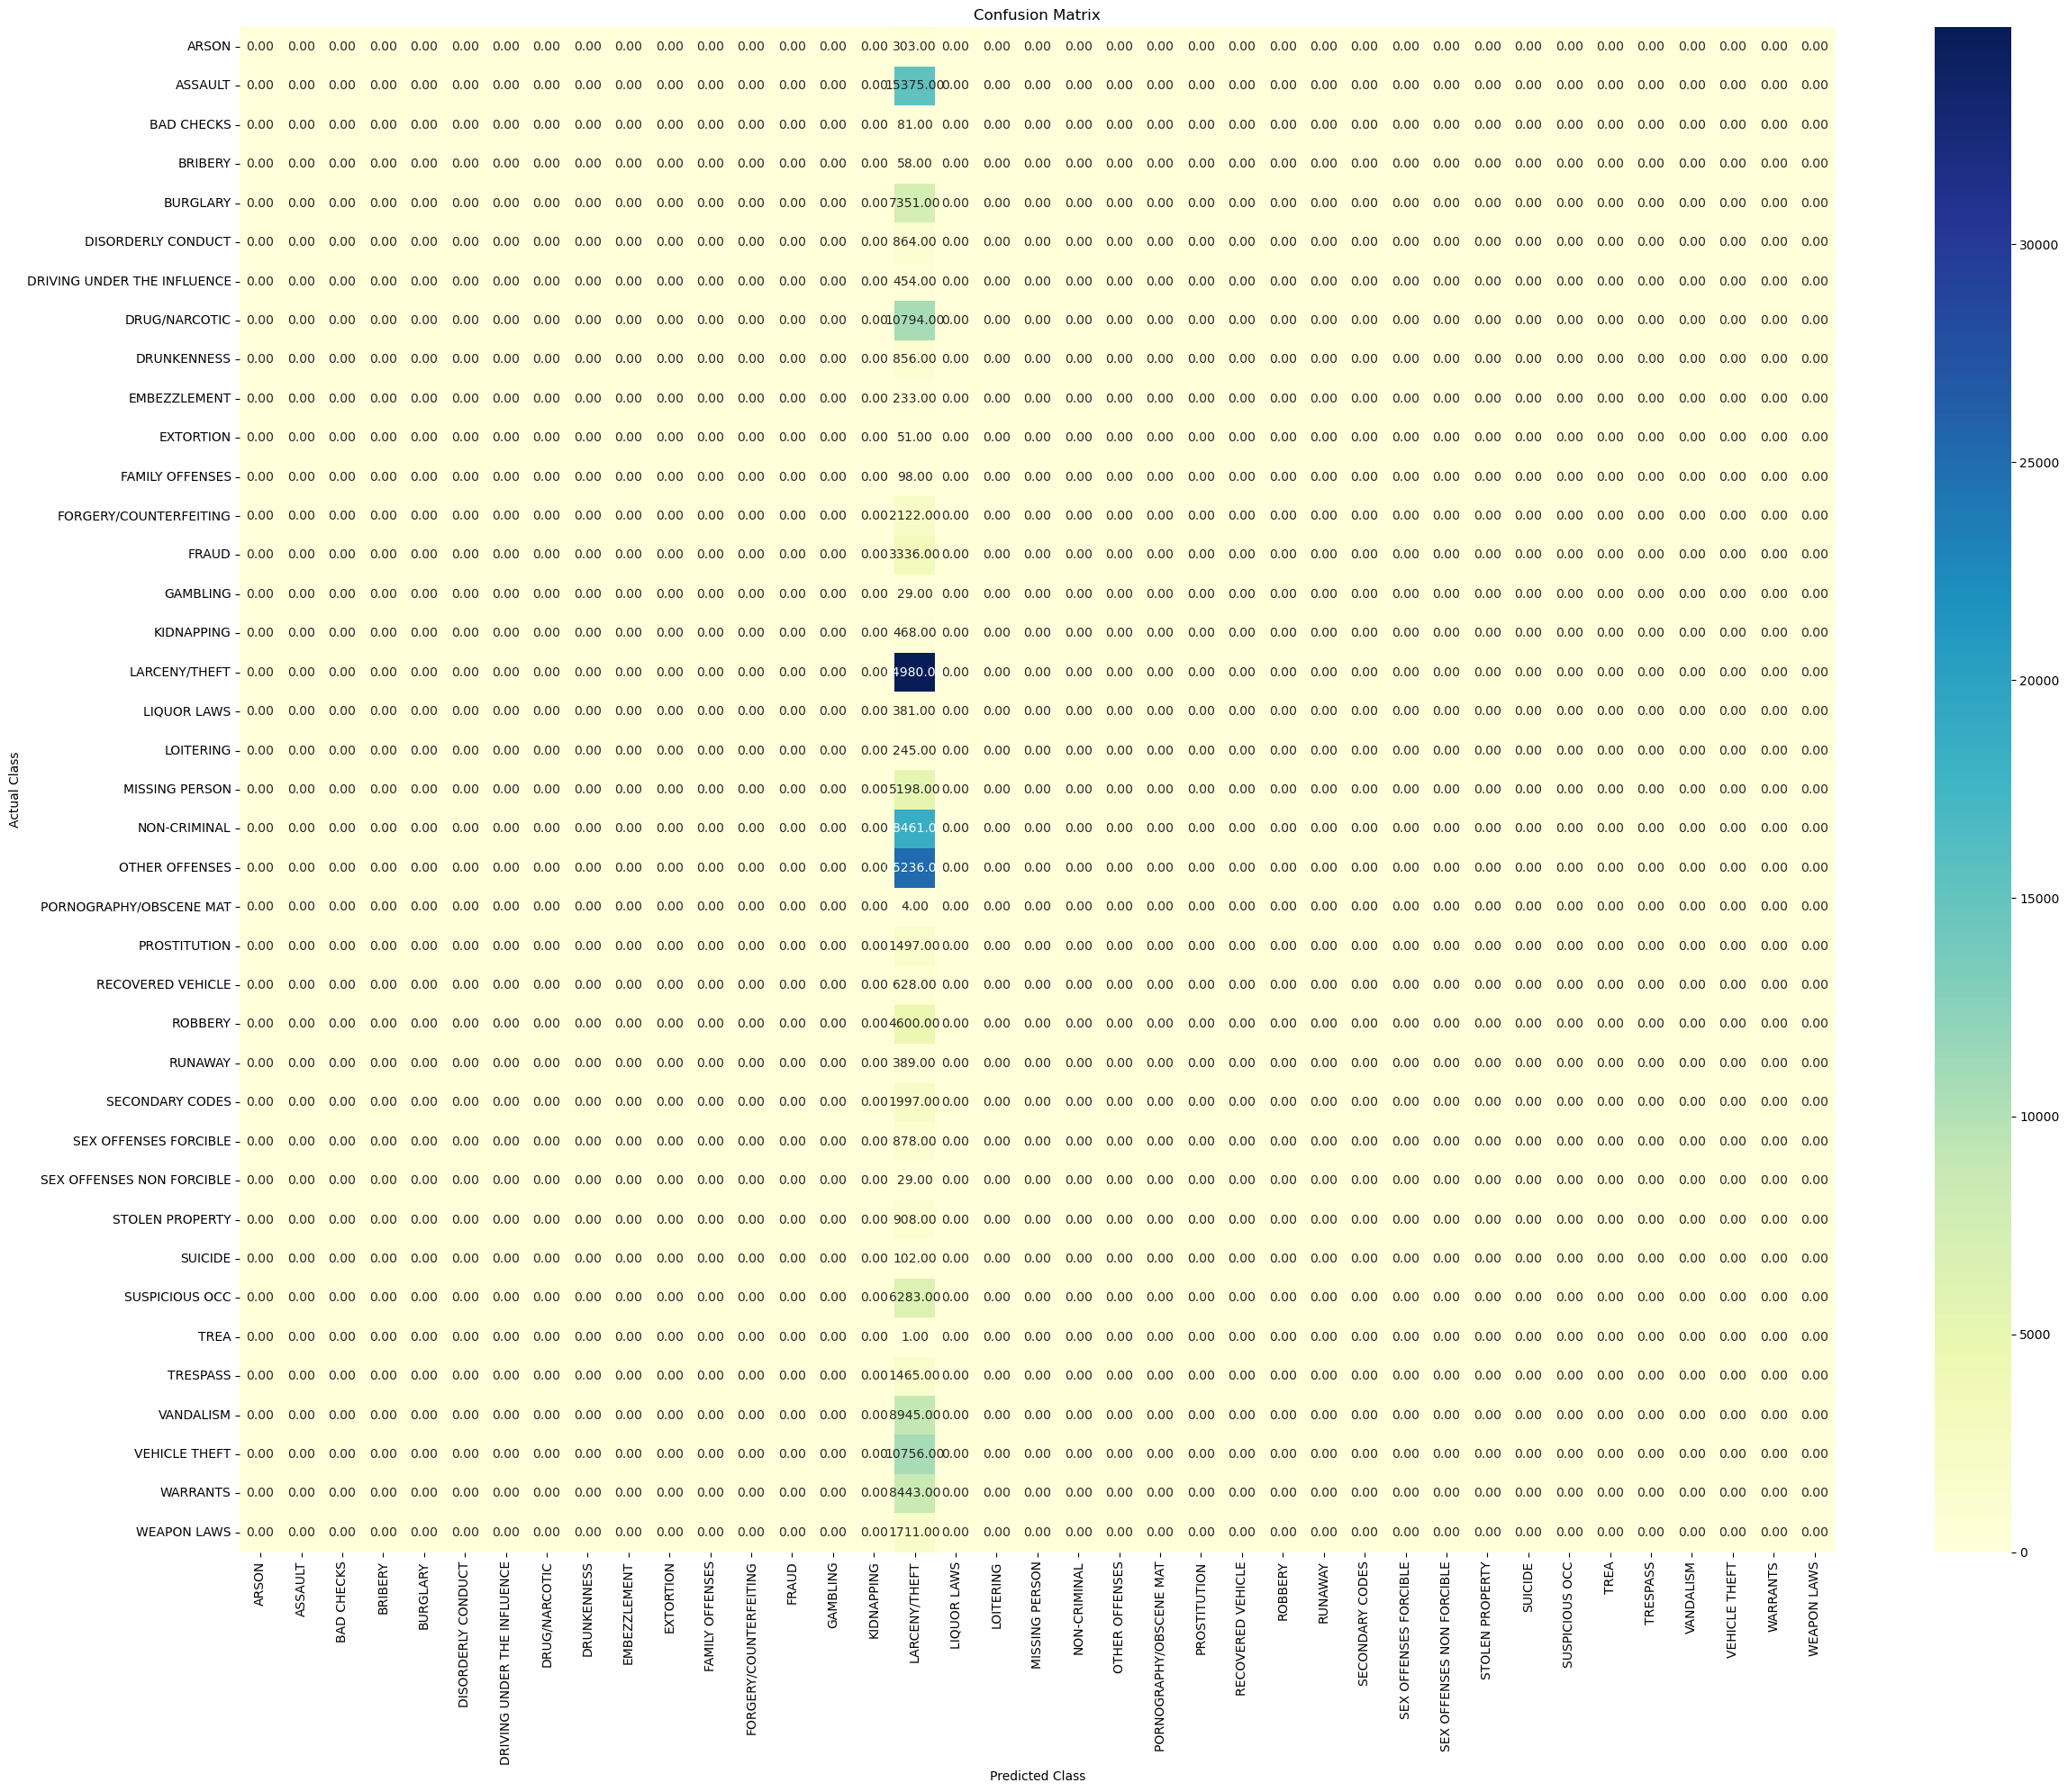

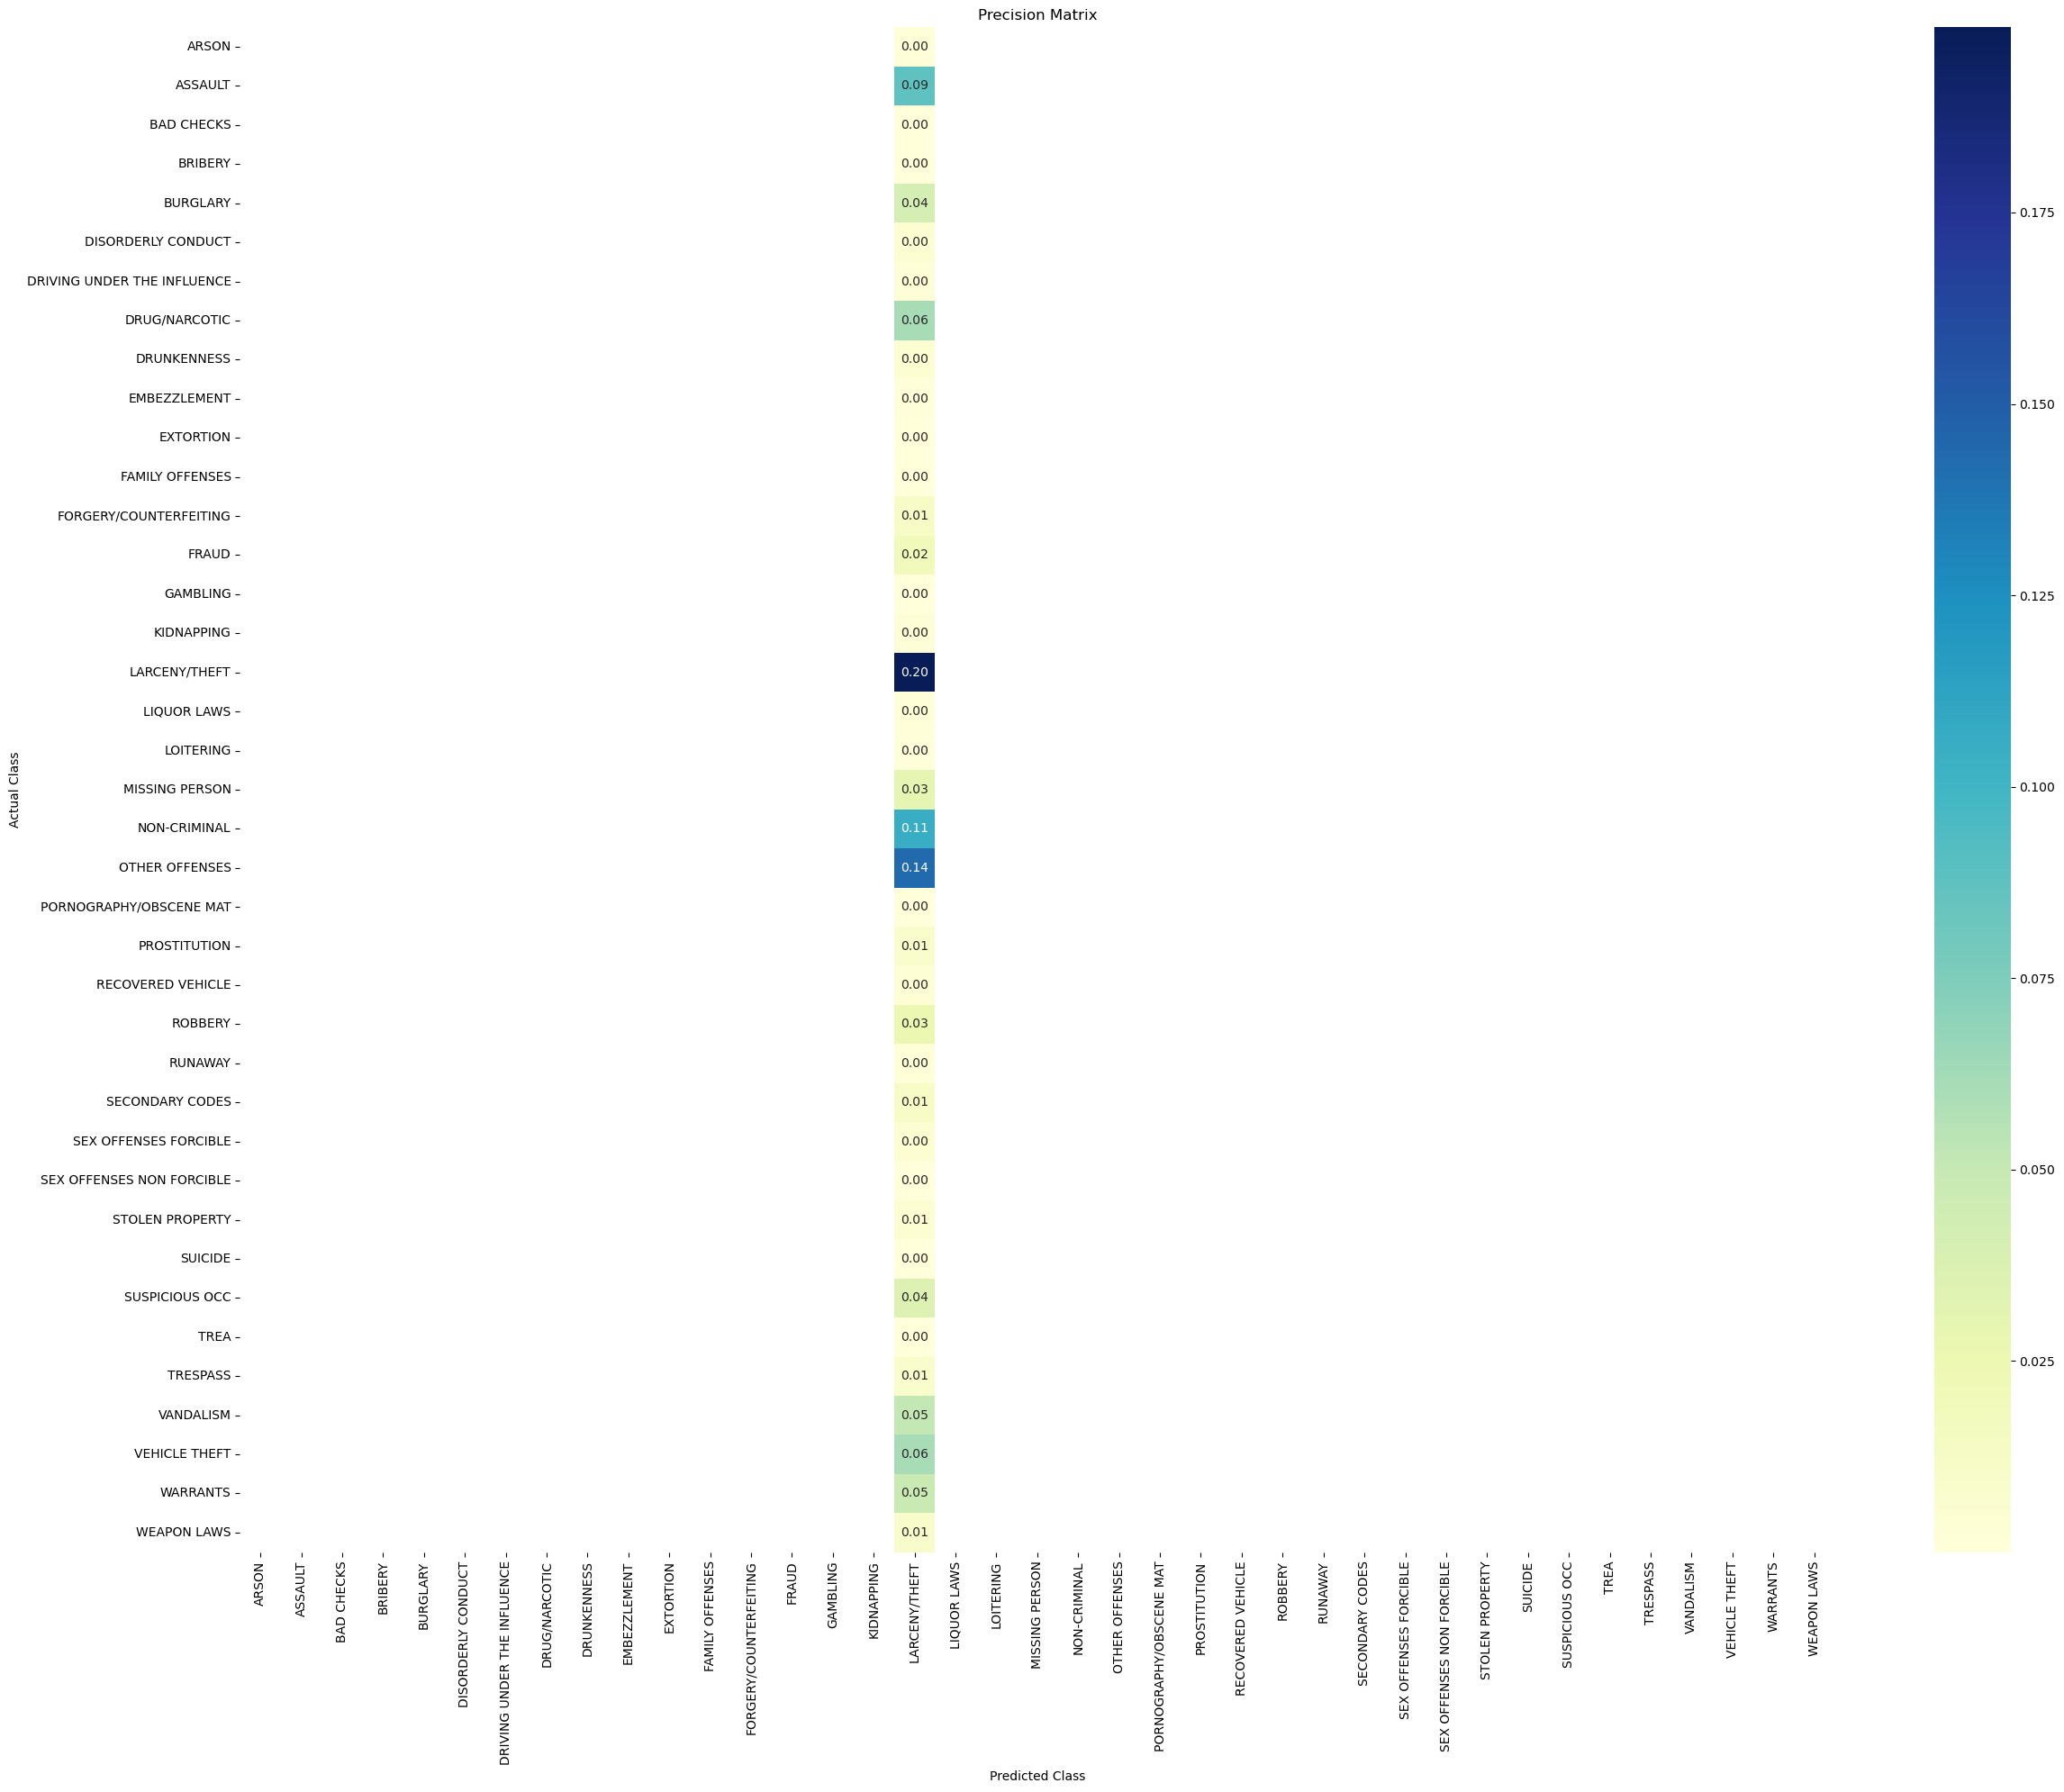

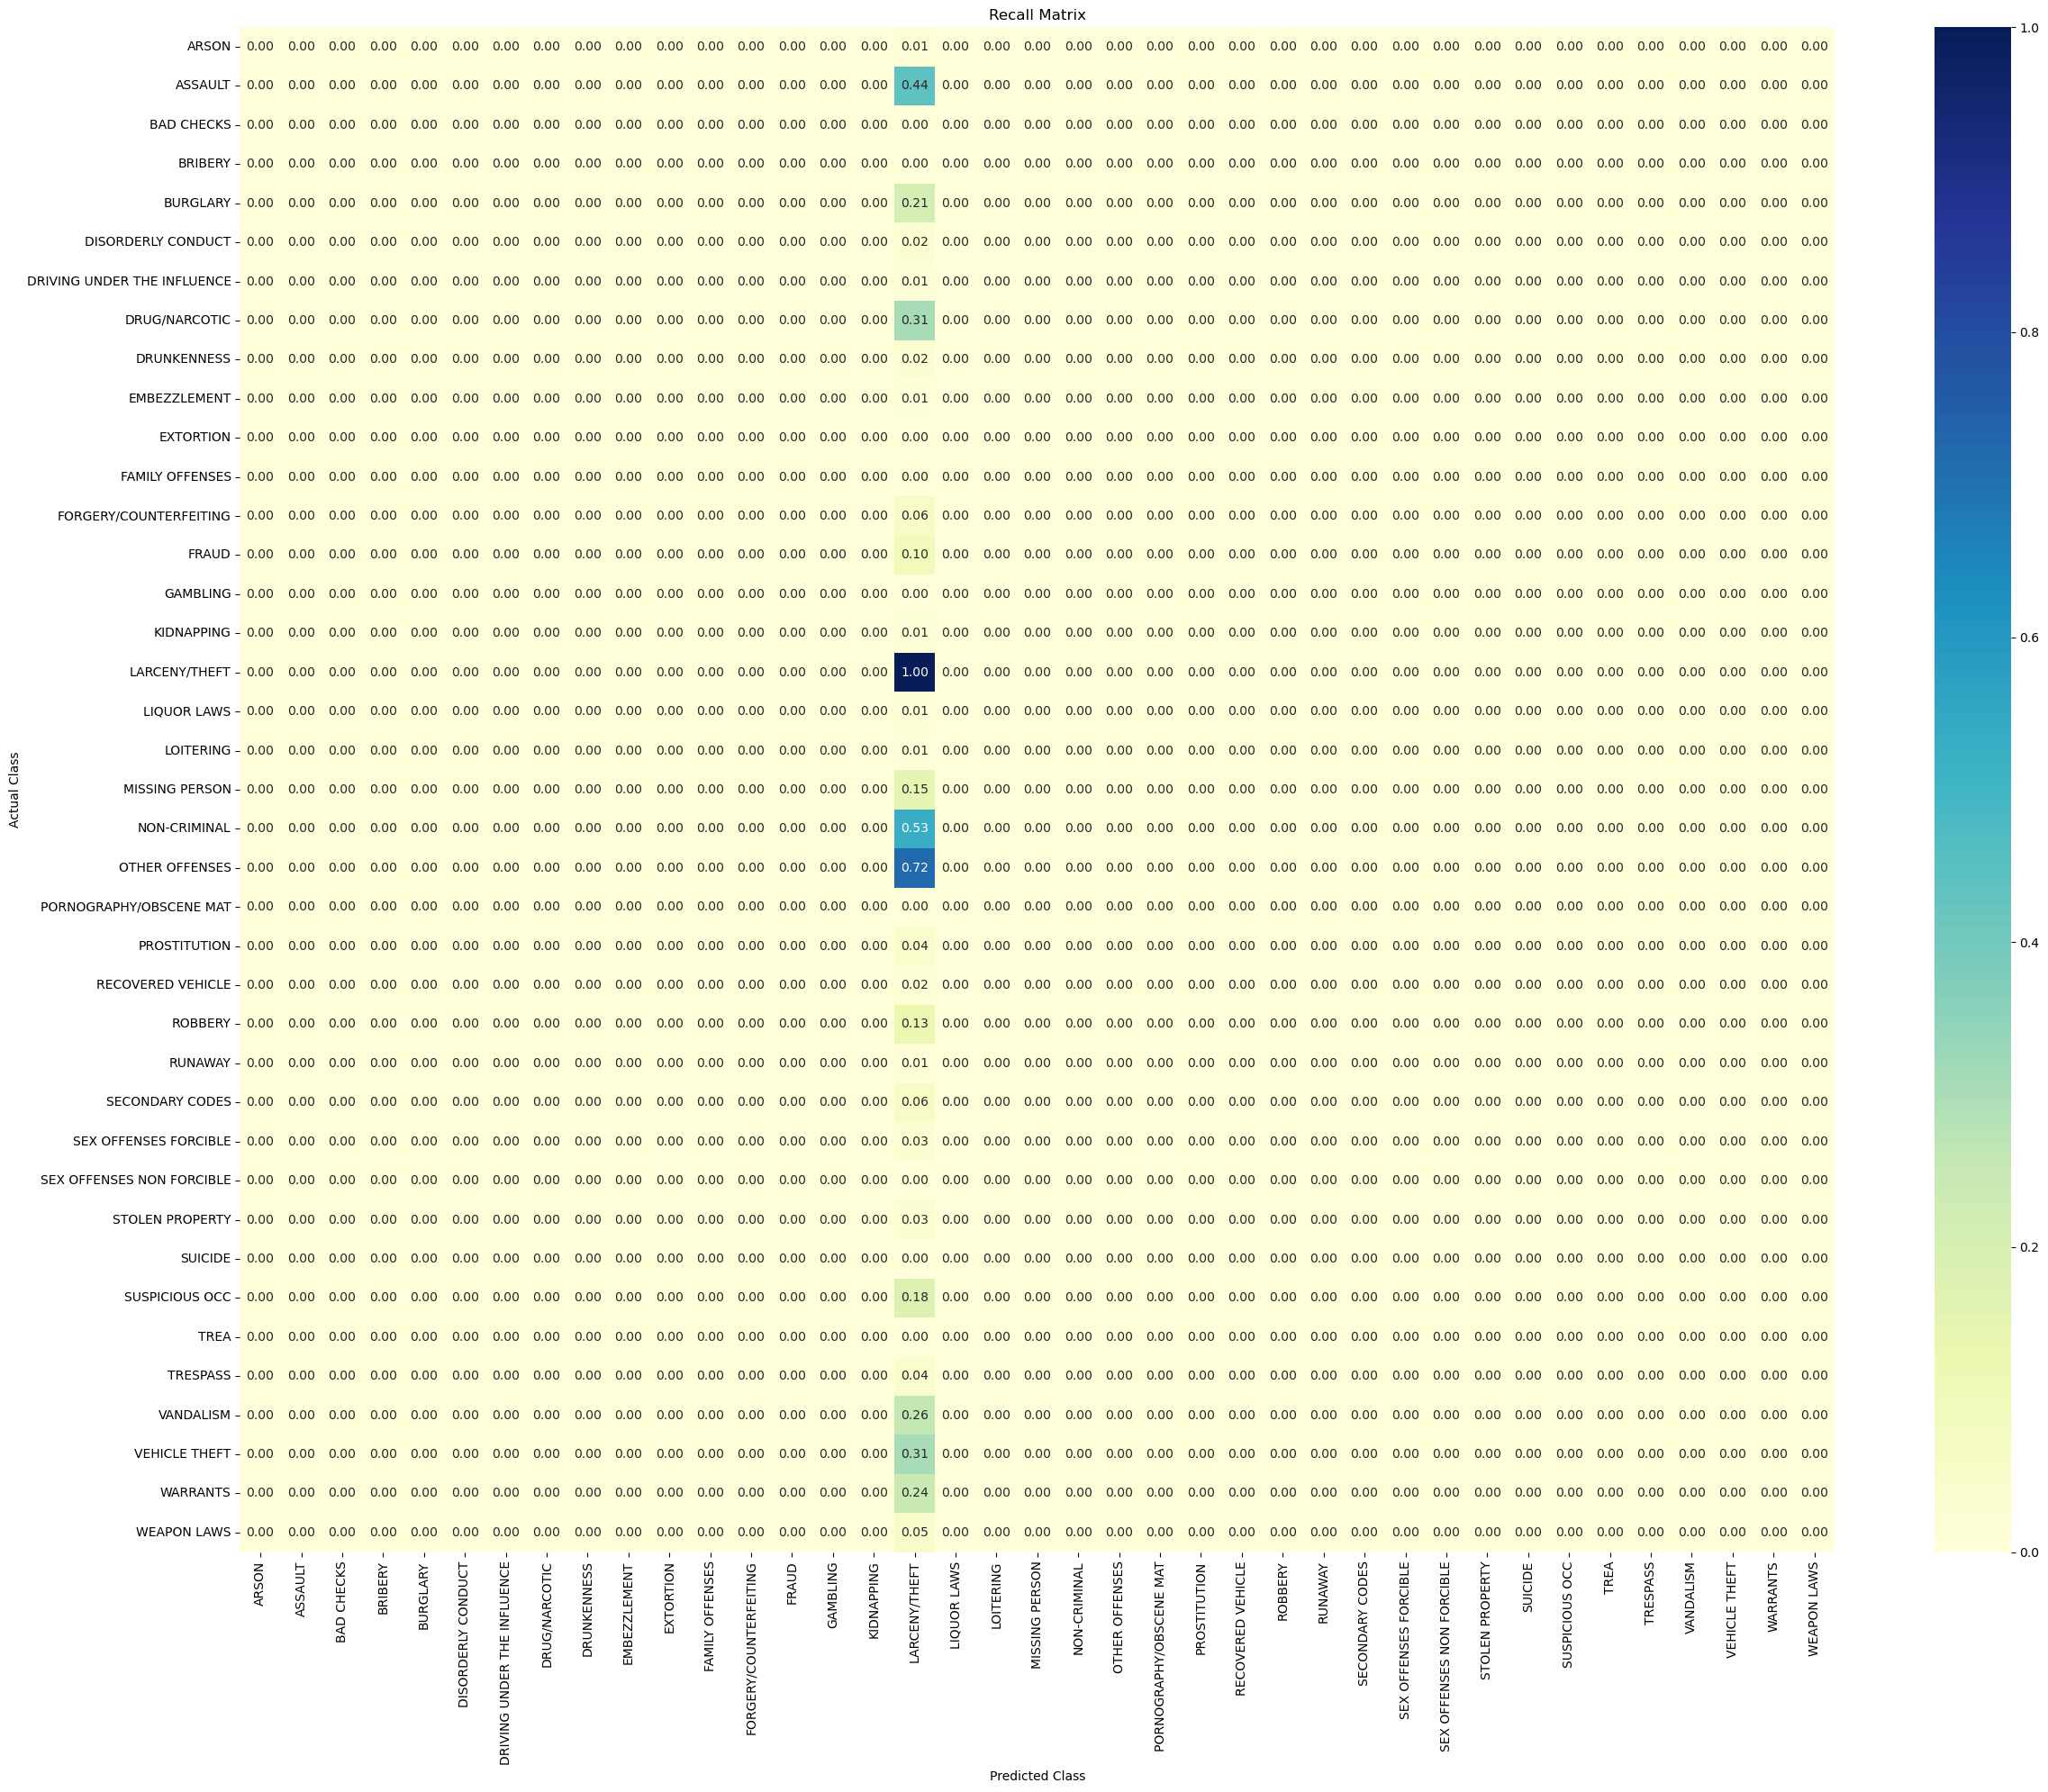

                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       303
                    ASSAULT       0.00      0.00      0.00     15375
                 BAD CHECKS       0.00      0.00      0.00        81
                    BRIBERY       0.00      0.00      0.00        58
                   BURGLARY       0.00      0.00      0.00      7351
         DISORDERLY CONDUCT       0.00      0.00      0.00       864
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       454
              DRUG/NARCOTIC       0.00      0.00      0.00     10794
                DRUNKENNESS       0.00      0.00      0.00       856
               EMBEZZLEMENT       0.00      0.00      0.00       233
                  EXTORTION       0.00      0.00      0.00        51
            FAMILY OFFENSES       0.00      0.00      0.00        98
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2122
                      FRAUD      

In [51]:
dummy_train_loss, dummy_valid_loss, dummy_test_loss = dummy_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test)

Logistic Regression

In [52]:
def log_reg_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):
    model_path = 'models/'
    model_name = 'log_reg_classifier.pkl'

    if not os.path.isfile(path=model_path + model_name):
        clf = LogisticRegression(penalty='l2', C=30, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
        sig_clf.fit(X_train, y_train)
    
        pickle.dump(sig_clf, open(model_path + model_name, 'wb'))
    else:
        print('Model already exists.')
        sig_clf = pickle.load(open(model_path + model_name, 'rb'))

    y_train_preds = sig_clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = sig_clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = sig_clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = sig_clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)
    
    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)

    return train_log_loss, valid_log_loss, test_log_loss

Model already exists.
Training Log Loss: 2.49143375202807
Validation Log Loss: 2.490112599741934
Testing Log Loss: 2.492798787275575


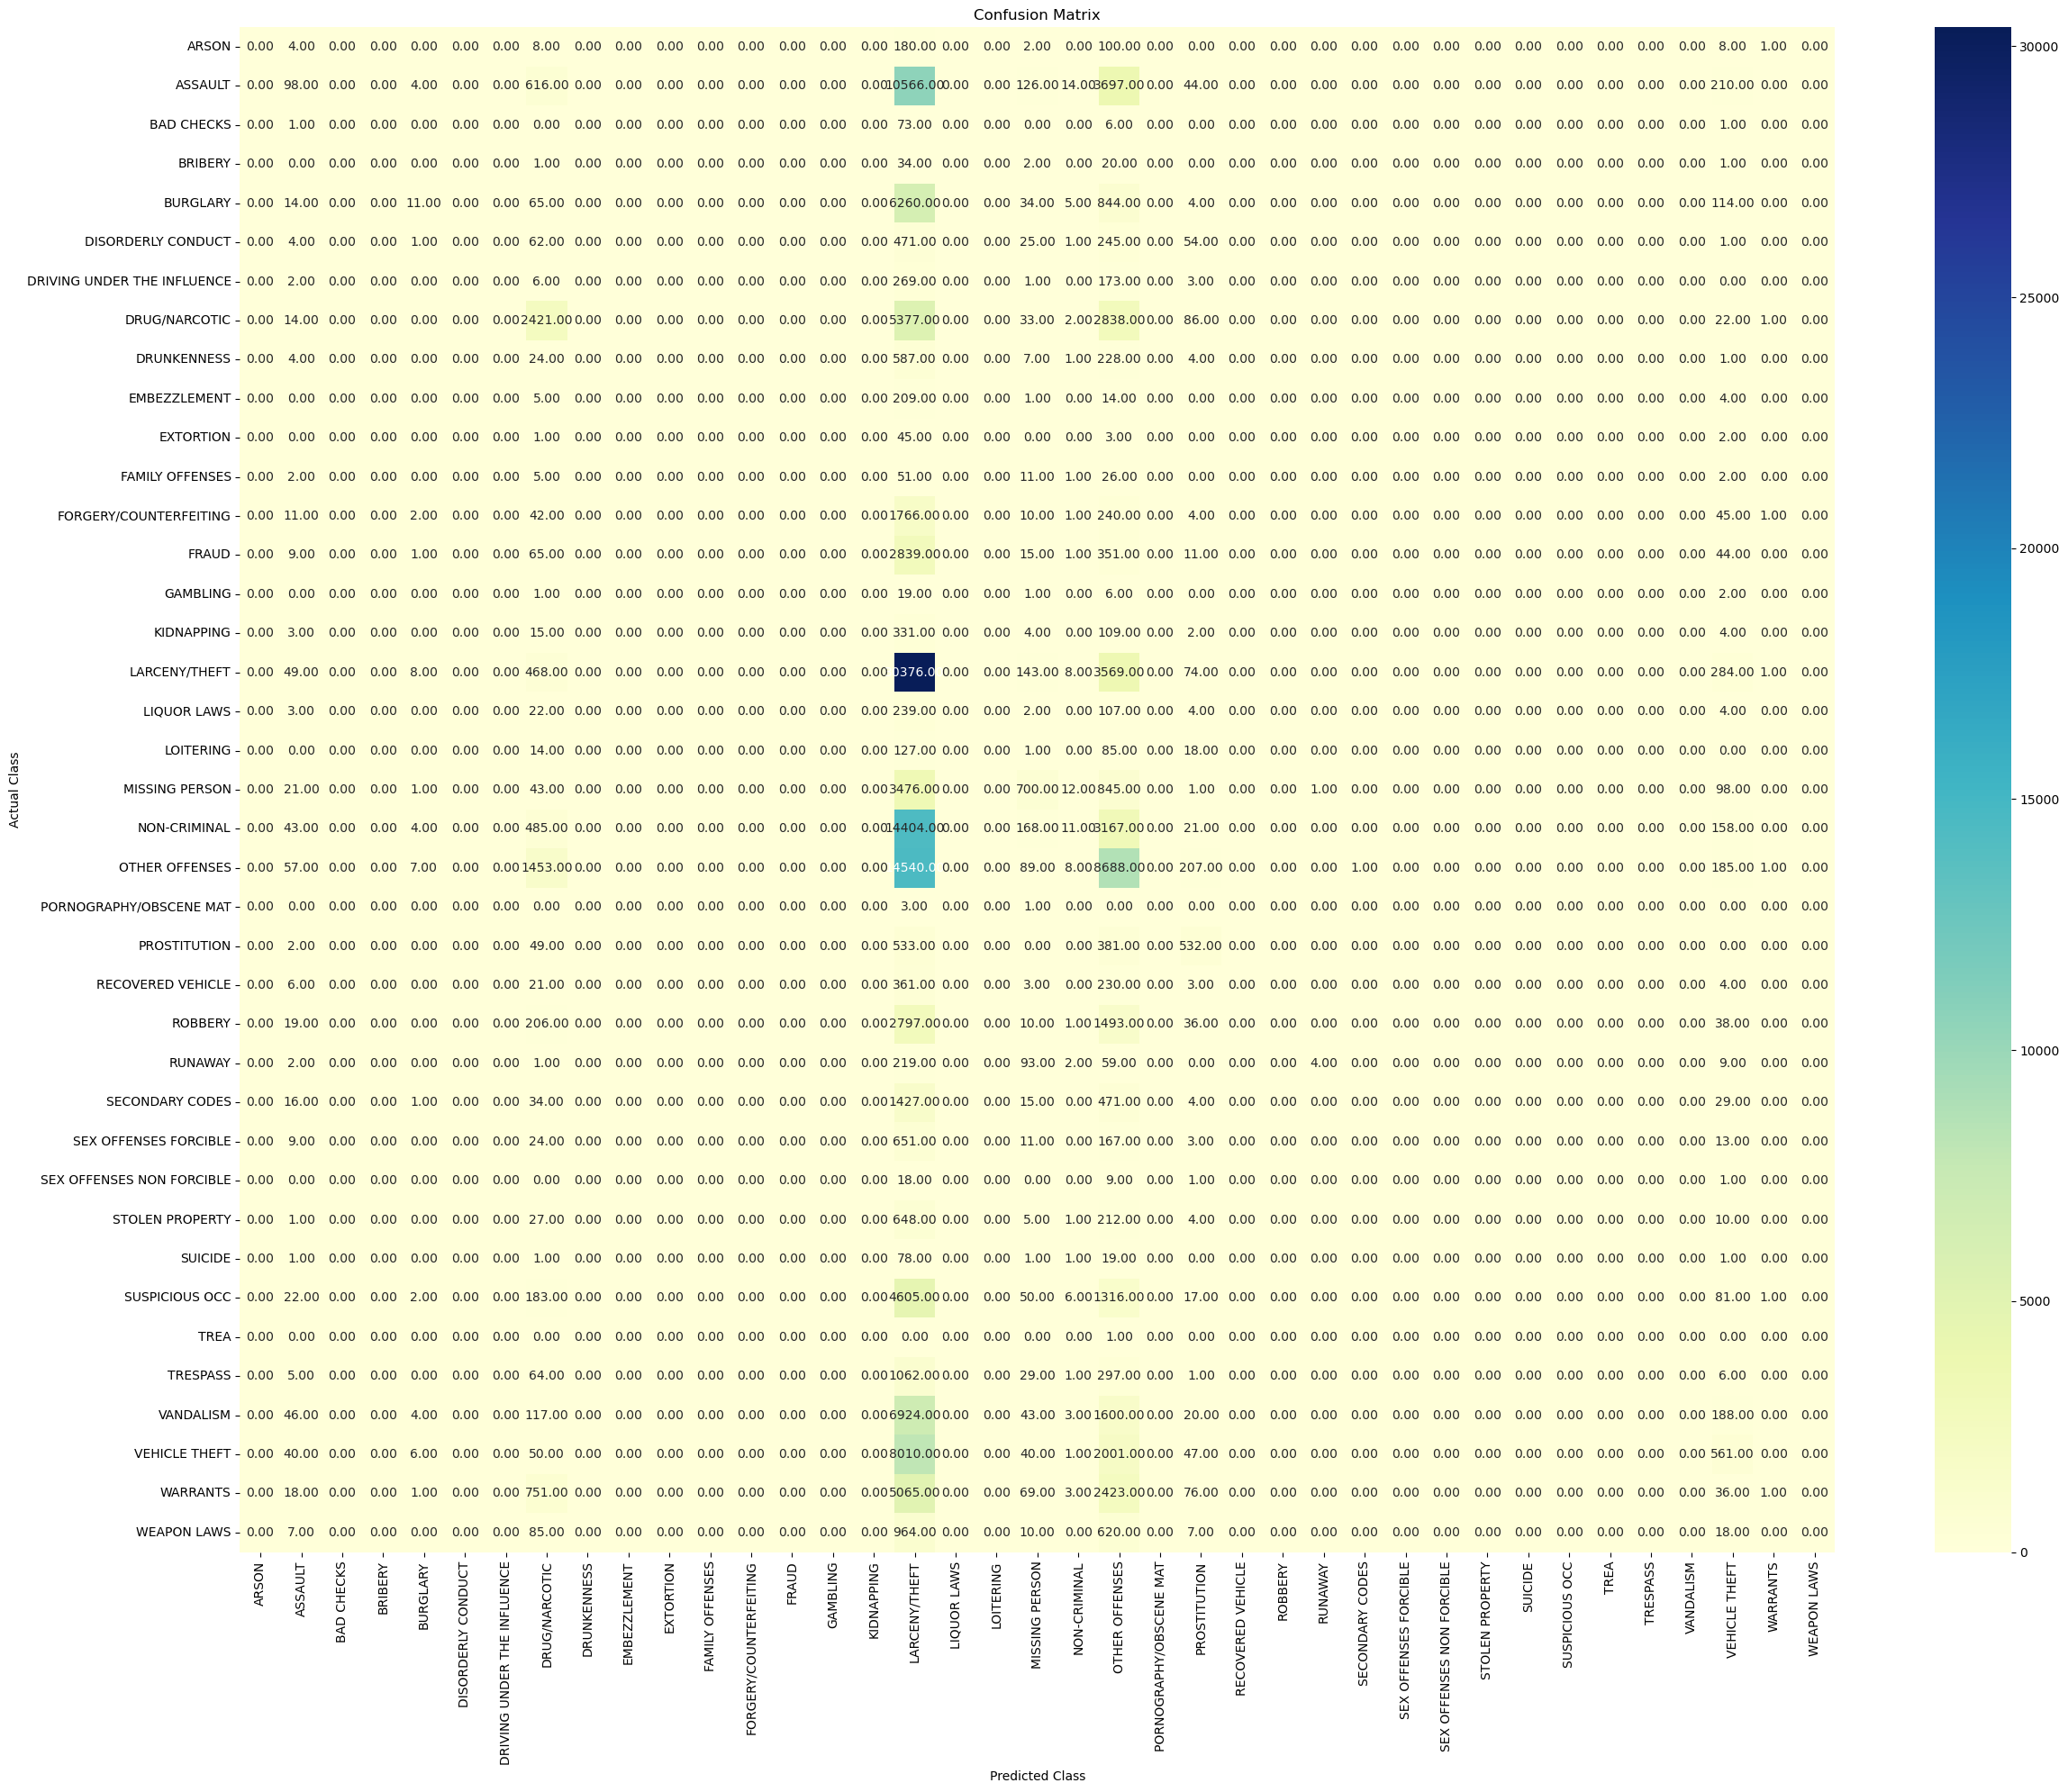

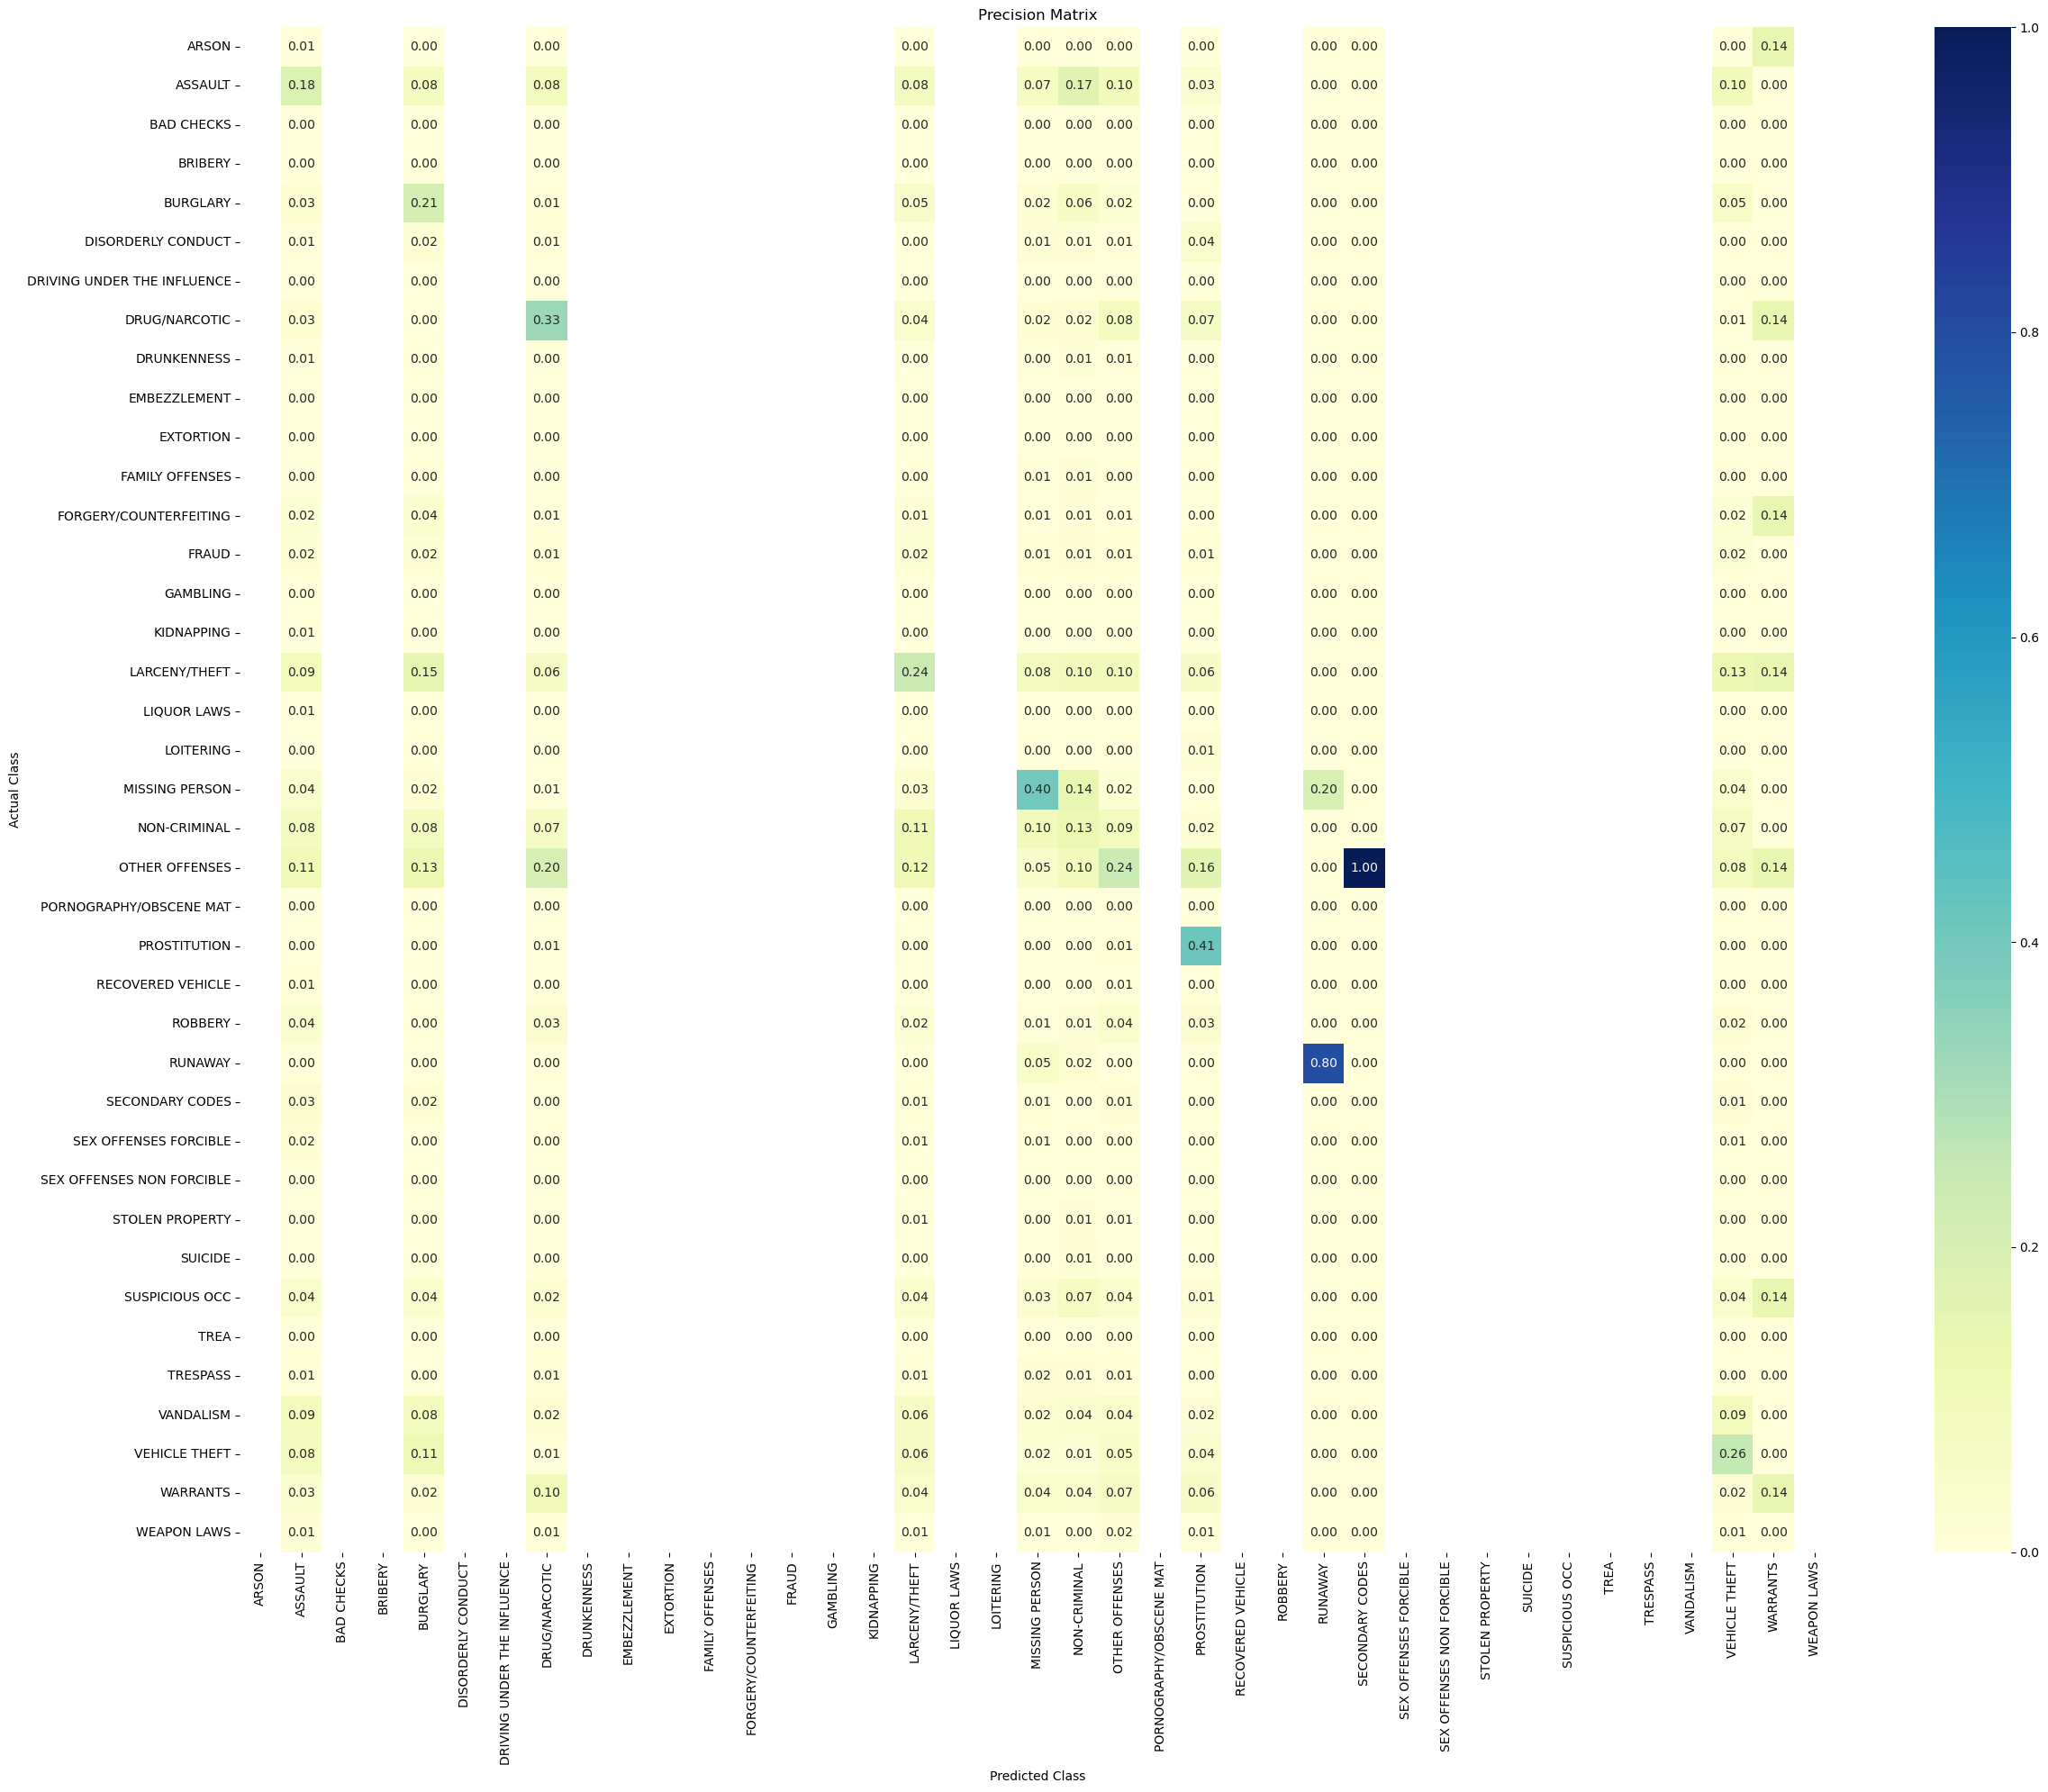

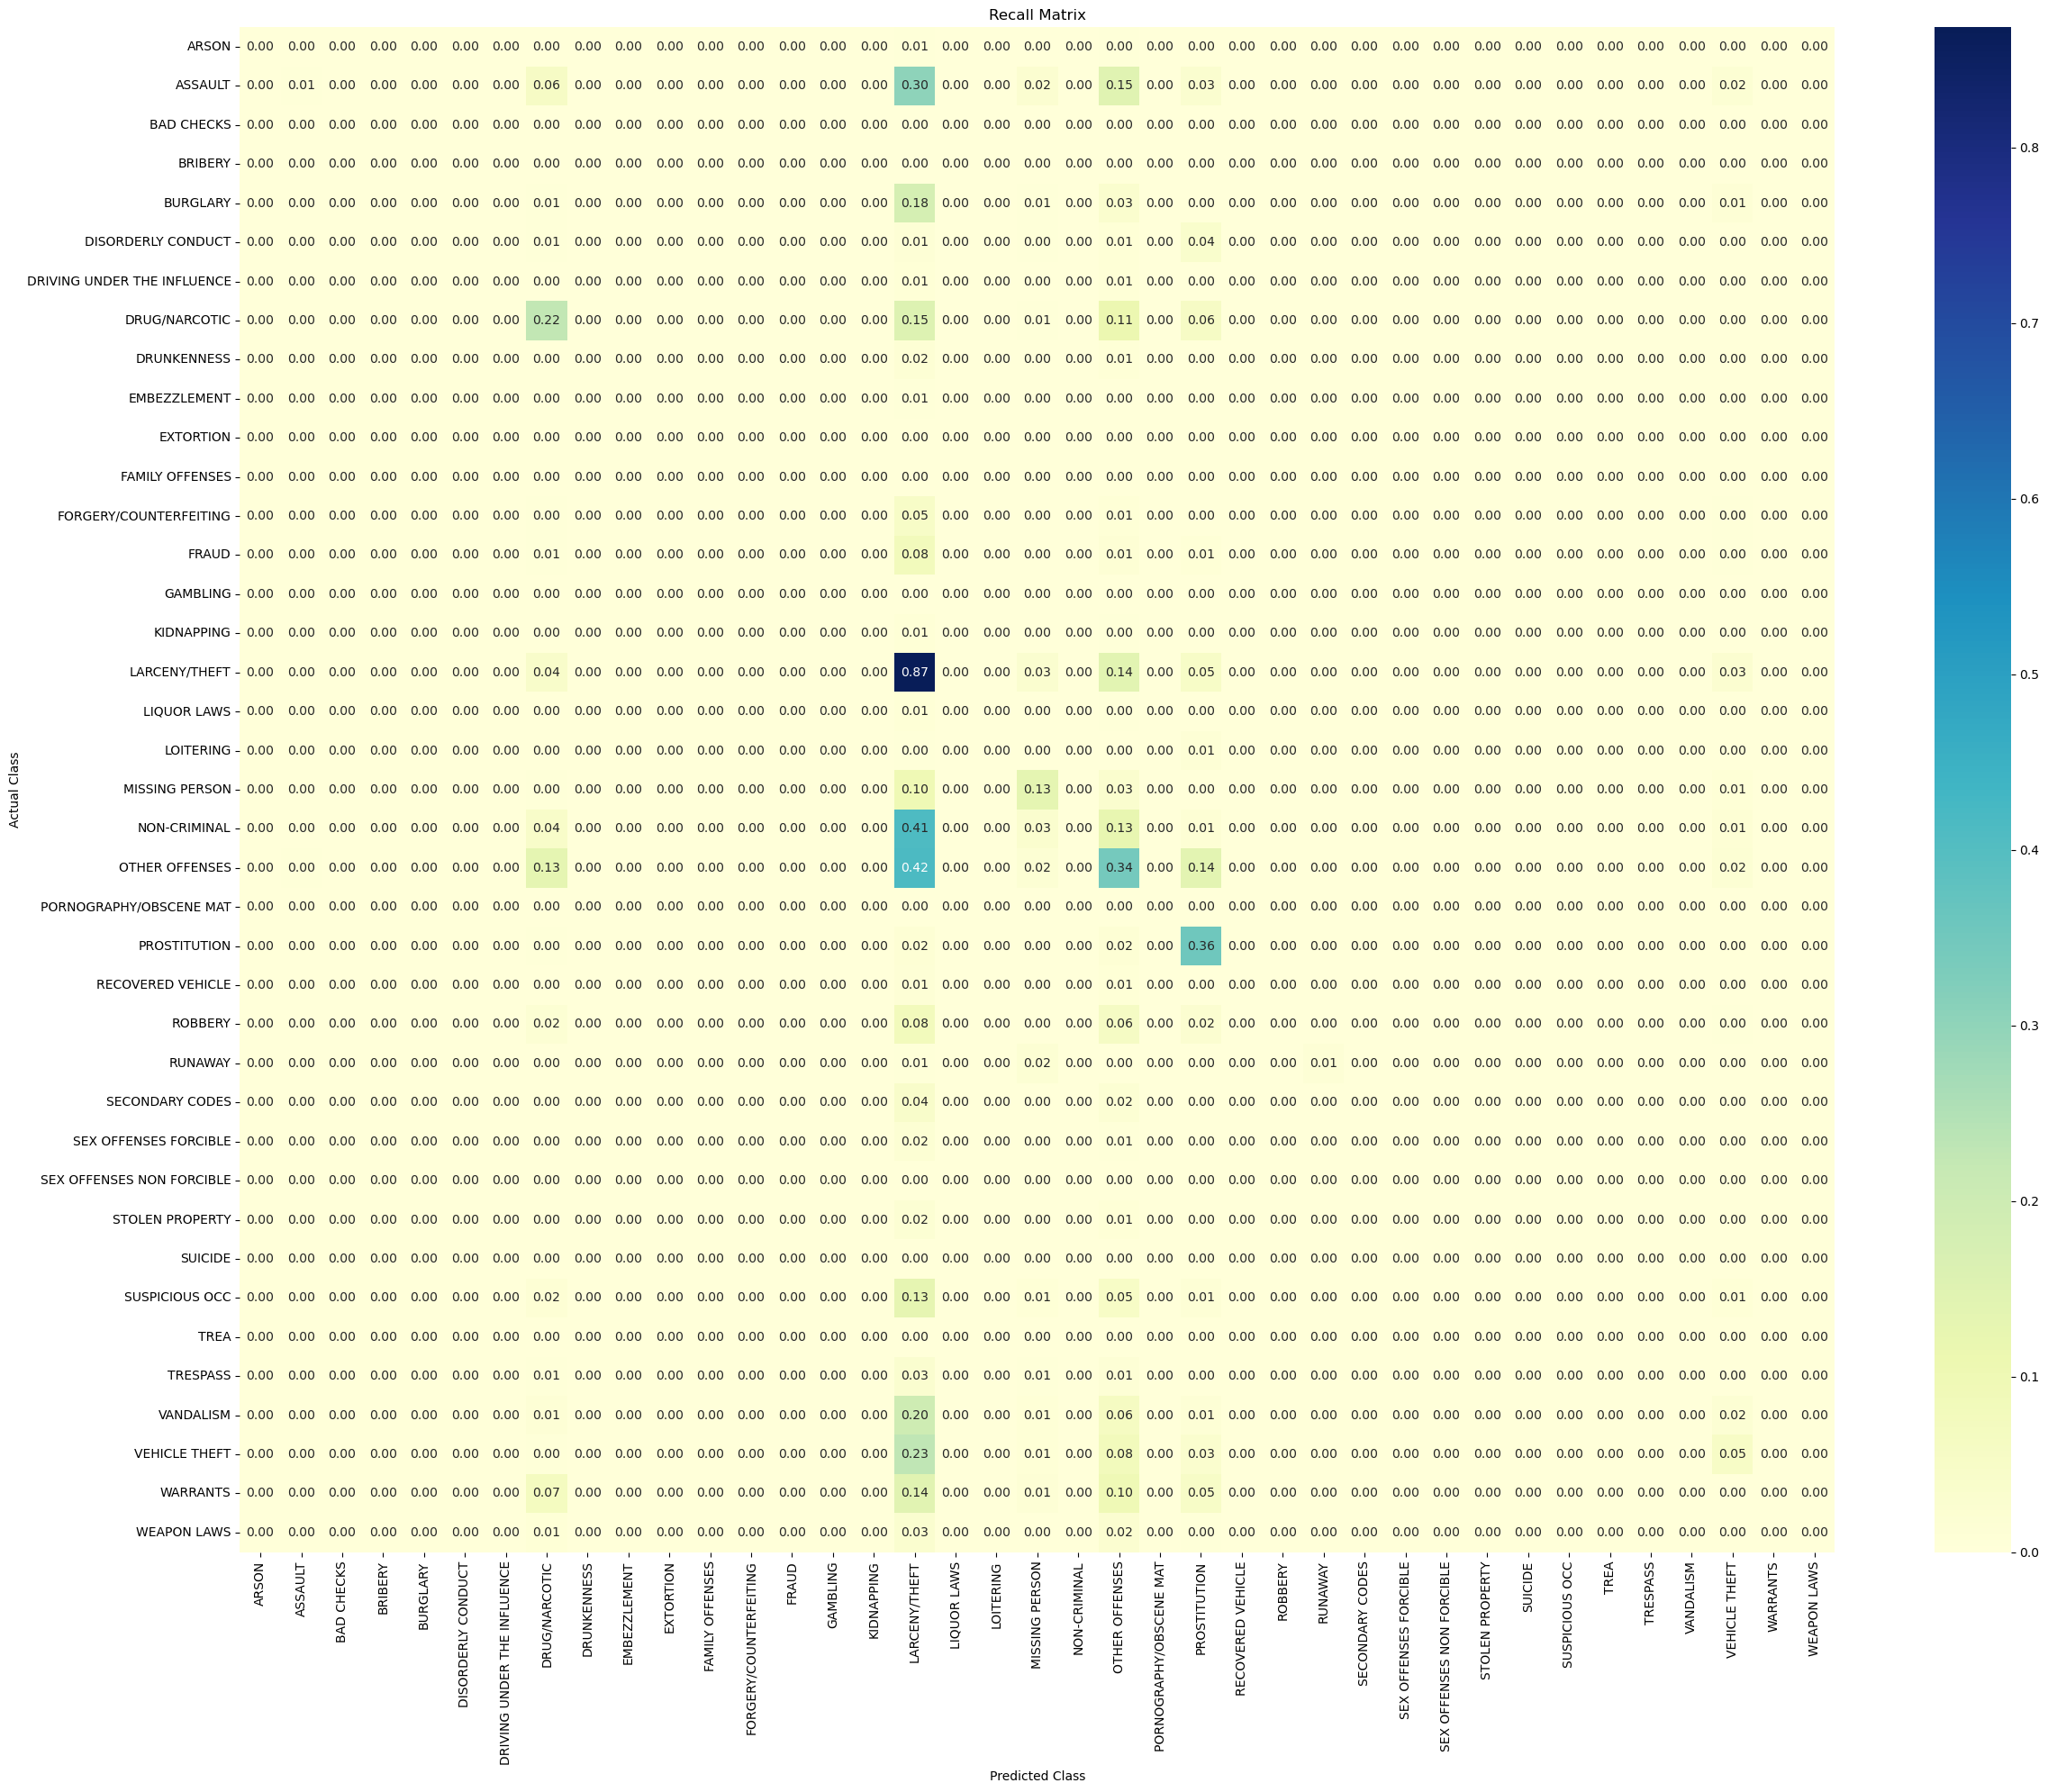

                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       303
                    ASSAULT       0.18      0.01      0.01     15375
                 BAD CHECKS       0.00      0.00      0.00        81
                    BRIBERY       0.00      0.00      0.00        58
                   BURGLARY       0.21      0.00      0.00      7351
         DISORDERLY CONDUCT       0.00      0.00      0.00       864
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       454
              DRUG/NARCOTIC       0.33      0.22      0.27     10794
                DRUNKENNESS       0.00      0.00      0.00       856
               EMBEZZLEMENT       0.00      0.00      0.00       233
                  EXTORTION       0.00      0.00      0.00        51
            FAMILY OFFENSES       0.00      0.00      0.00        98
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2122
                      FRAUD      

In [53]:
lr_train_loss, lr_valid_loss, lr_test_loss = log_reg_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test)

Decision Tree Classifier

In [54]:
def decision_tree_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):
    model_path = 'models/'
    model_name = 'decision_tree_classifier.pkl'

    if not os.path.isfile(path=model_path + model_name):
        clf = DecisionTreeClassifier(max_depth=50, min_samples_split=500)
        clf.fit(X_train, y_train)

        sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
        sig_clf.fit(X_train, y_train)
    
        pickle.dump(sig_clf, open(model_path + model_name, 'wb'))
    else:
        print('Model already exists.')
        sig_clf = pickle.load(open(model_path + model_name, 'rb'))

    y_train_preds = sig_clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = sig_clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = sig_clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = sig_clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)
    
    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)

    return train_log_loss, valid_log_loss, test_log_loss

Model already exists.
Training Log Loss: 2.340889691471769
Validation Log Loss: 2.3403919008713046
Testing Log Loss: 2.3392855213808743


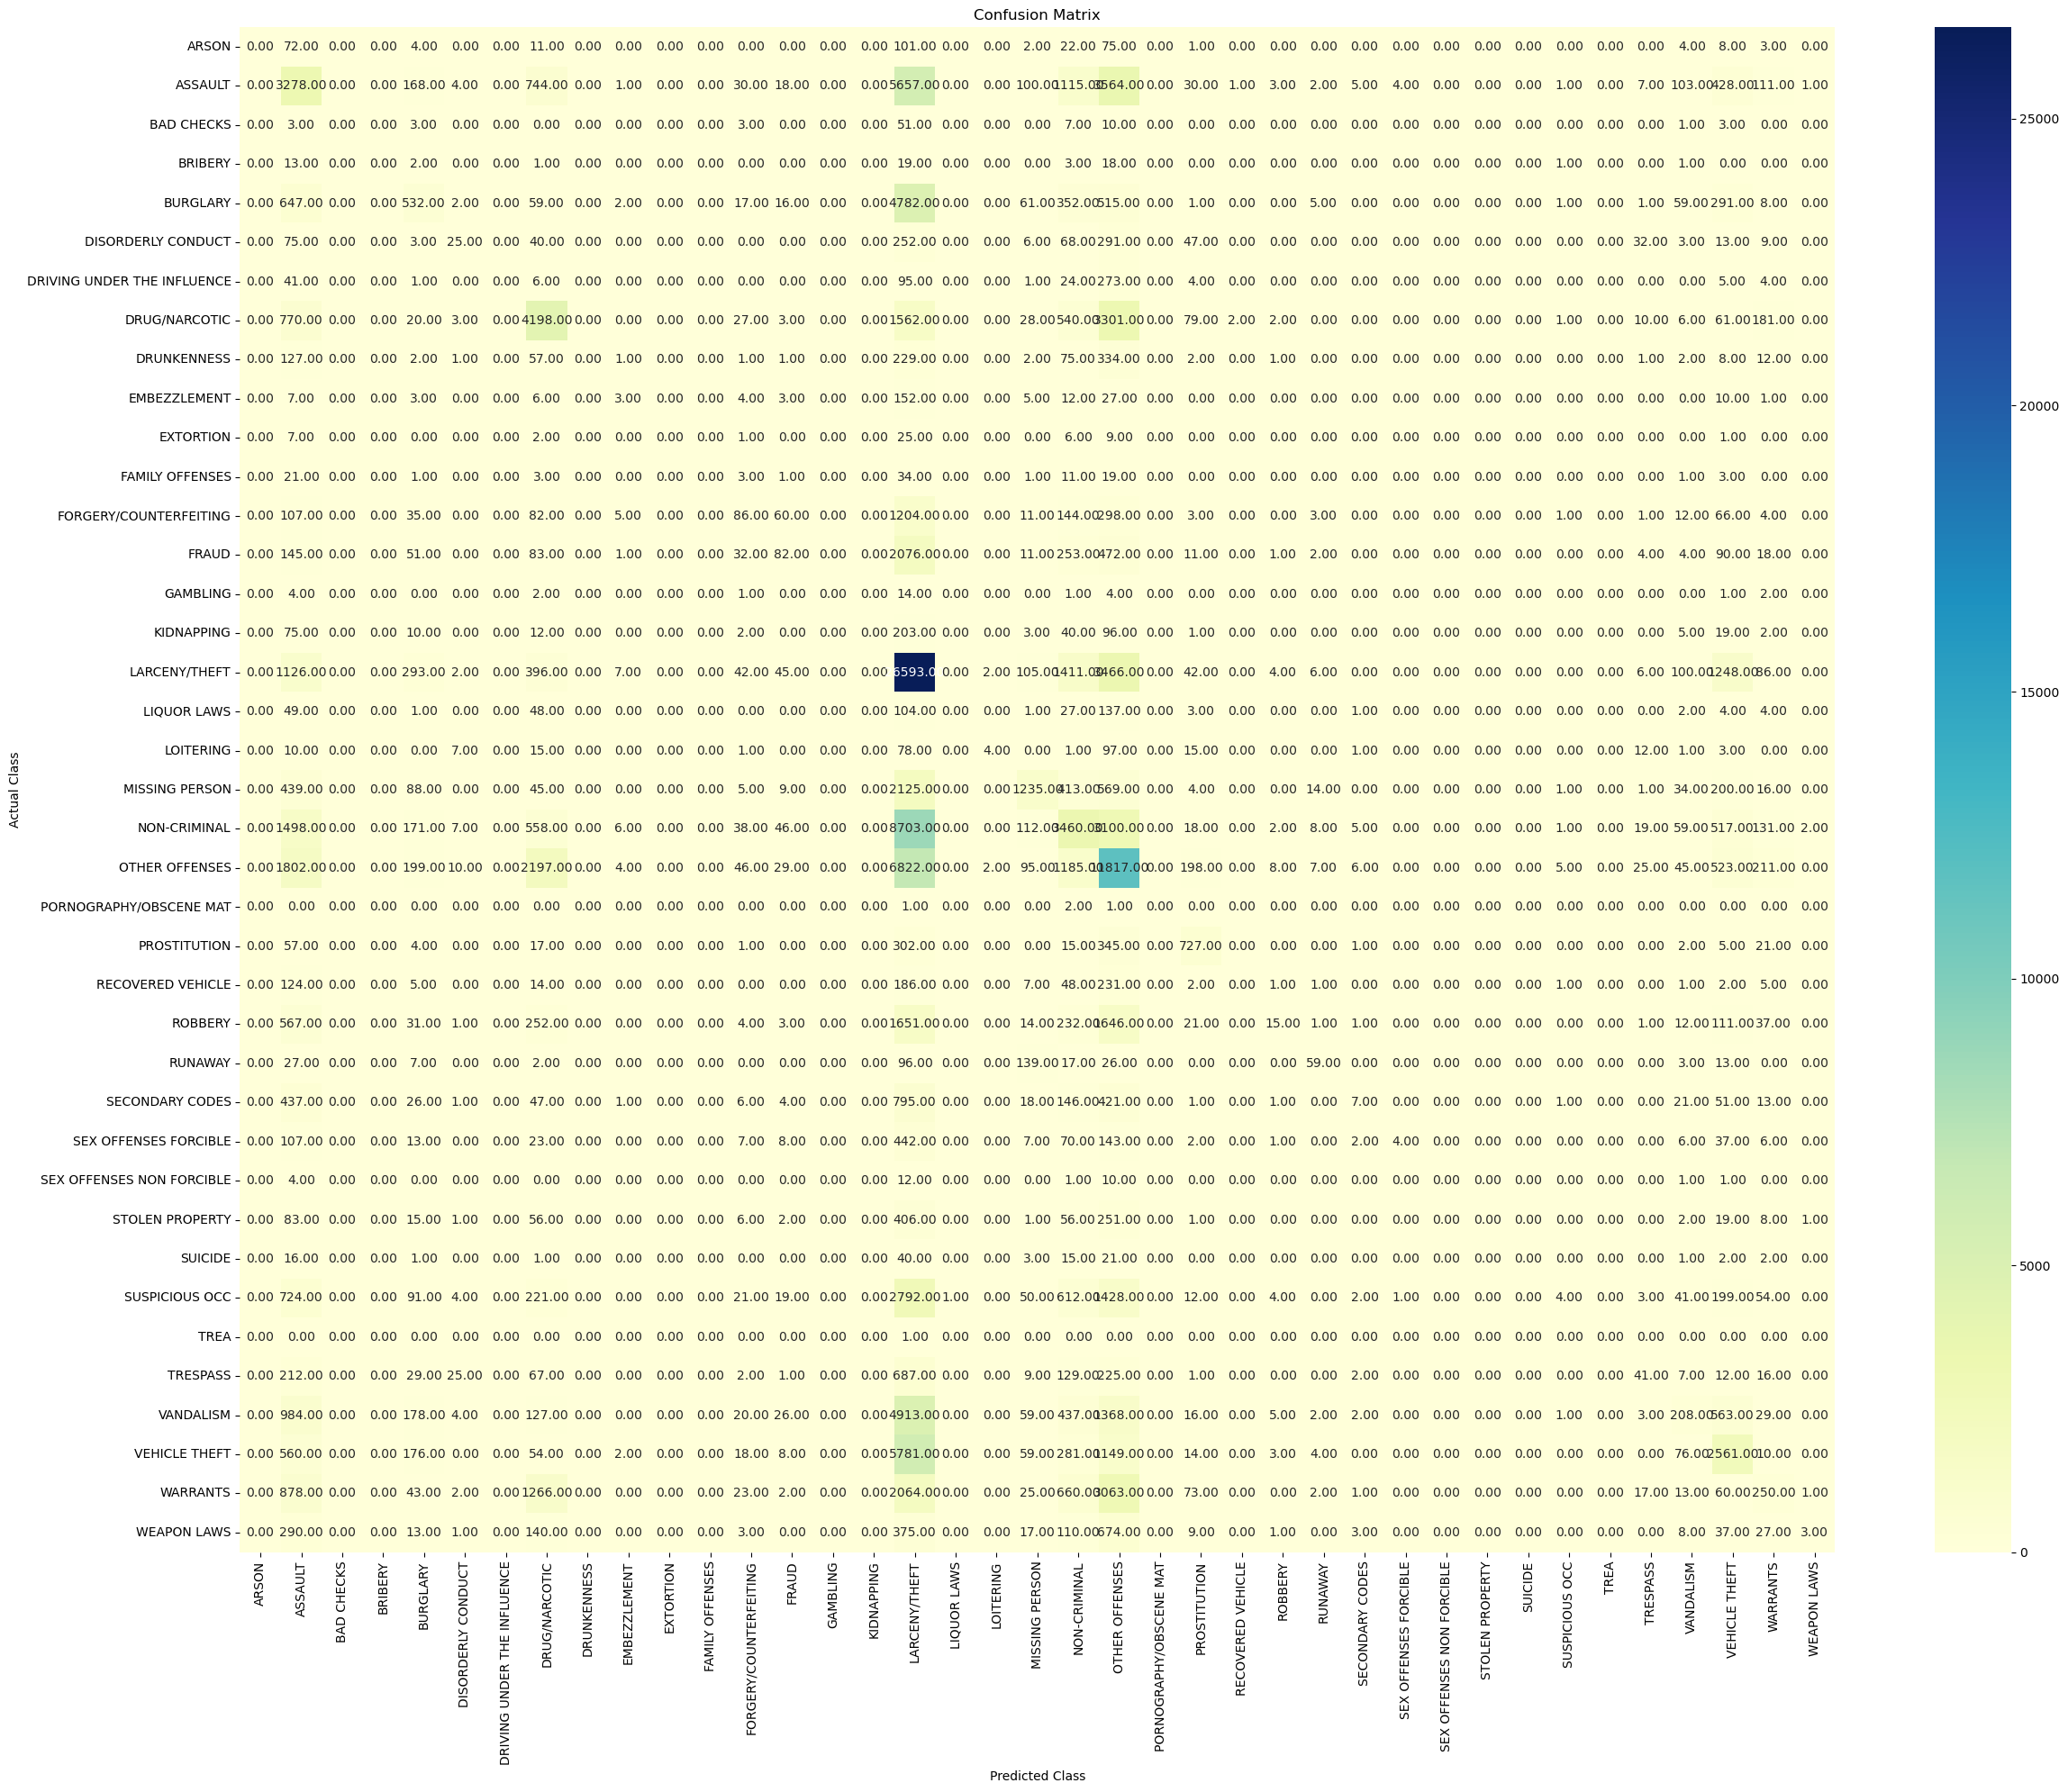

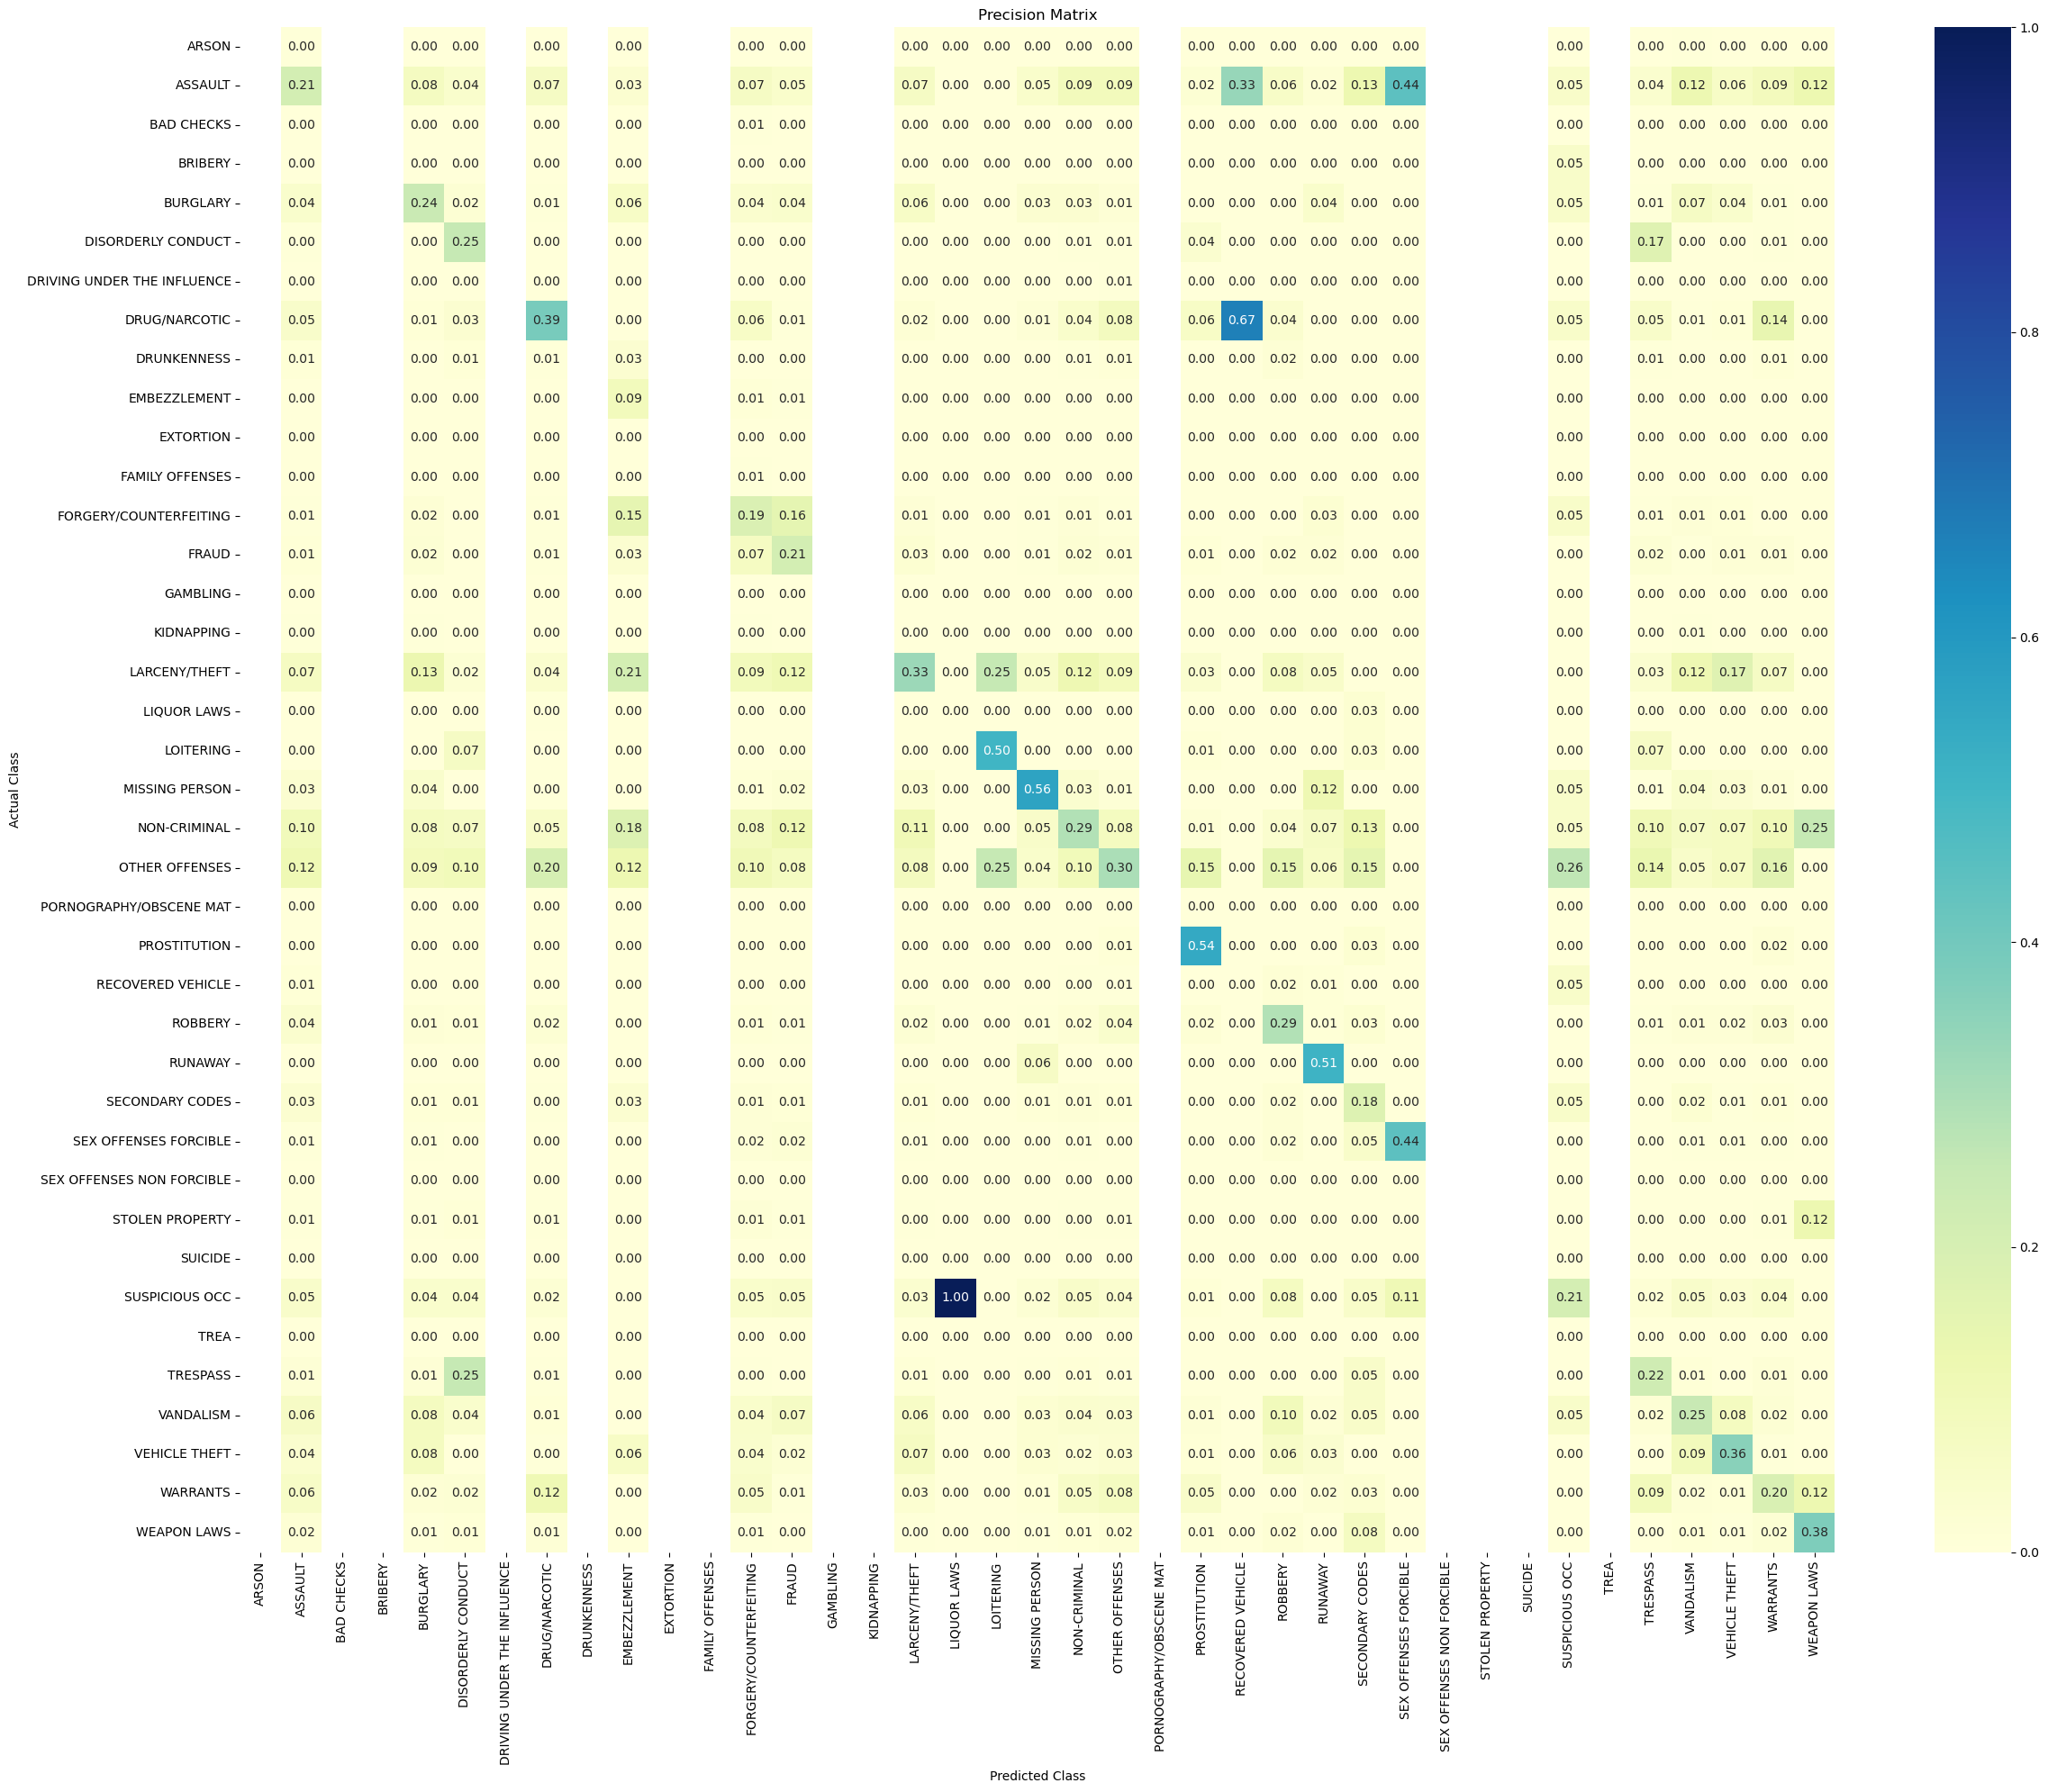

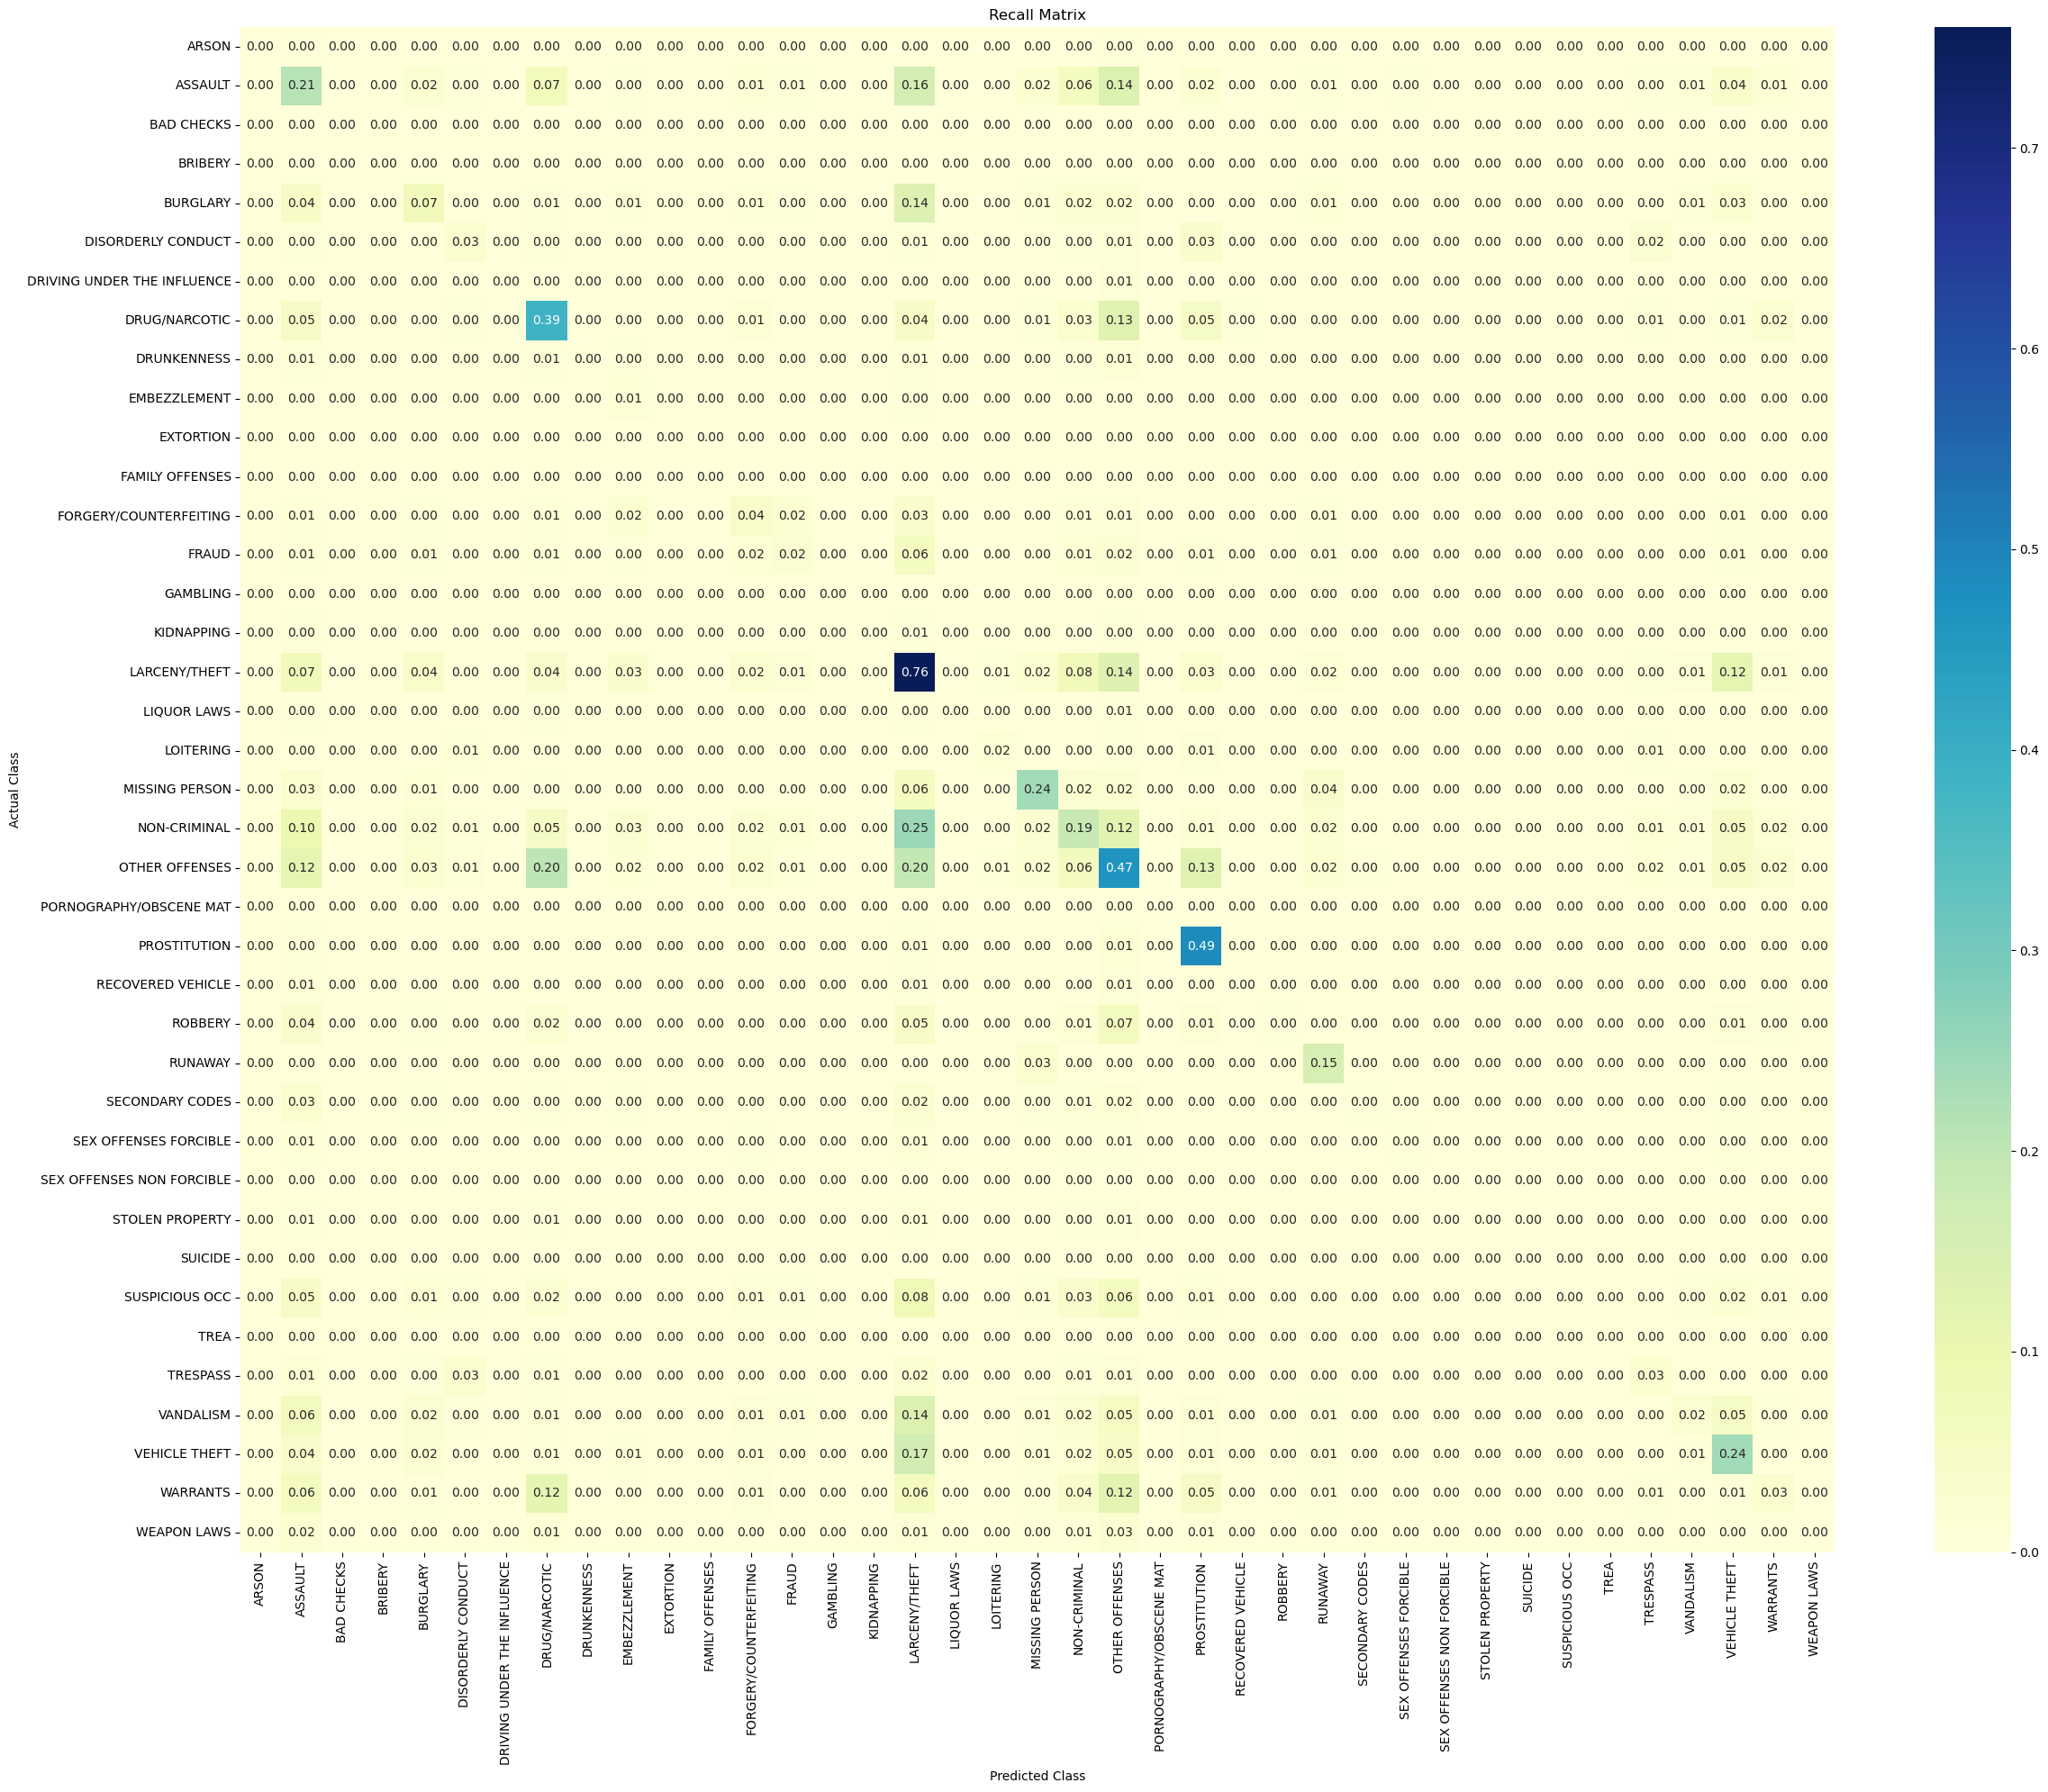

                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       303
                    ASSAULT       0.21      0.21      0.21     15375
                 BAD CHECKS       0.00      0.00      0.00        81
                    BRIBERY       0.00      0.00      0.00        58
                   BURGLARY       0.24      0.07      0.11      7351
         DISORDERLY CONDUCT       0.25      0.03      0.05       864
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       454
              DRUG/NARCOTIC       0.39      0.39      0.39     10794
                DRUNKENNESS       0.00      0.00      0.00       856
               EMBEZZLEMENT       0.09      0.01      0.02       233
                  EXTORTION       0.00      0.00      0.00        51
            FAMILY OFFENSES       0.00      0.00      0.00        98
     FORGERY/COUNTERFEITING       0.19      0.04      0.07      2122
                      FRAUD      

In [55]:
dt_train_loss, dt_valid_loss, dt_test_loss = decision_tree_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test)

RandomForest

In [56]:
def random_forest_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):
    model_path = 'models/'
    model_name = 'random_forest_classifier.pkl'

    if not os.path.isfile(path=model_path + model_name):
        clf = RandomForestClassifier(max_depth=8, n_estimators=100)
        clf.fit(X_train, y_train)

        sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
        sig_clf.fit(X_train, y_train)
    
        pickle.dump(sig_clf, open(model_path + model_name, 'wb'))
    else:
        print('Model already exists.')
        sig_clf = pickle.load(open(model_path + model_name, 'rb'))

    y_train_preds = sig_clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = sig_clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = sig_clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = sig_clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)
    
    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)

    return train_log_loss, valid_log_loss, test_log_loss

Model already exists.
Training Log Loss: 2.394582057473068
Validation Log Loss: 2.392450702655994
Testing Log Loss: 2.395727957838608


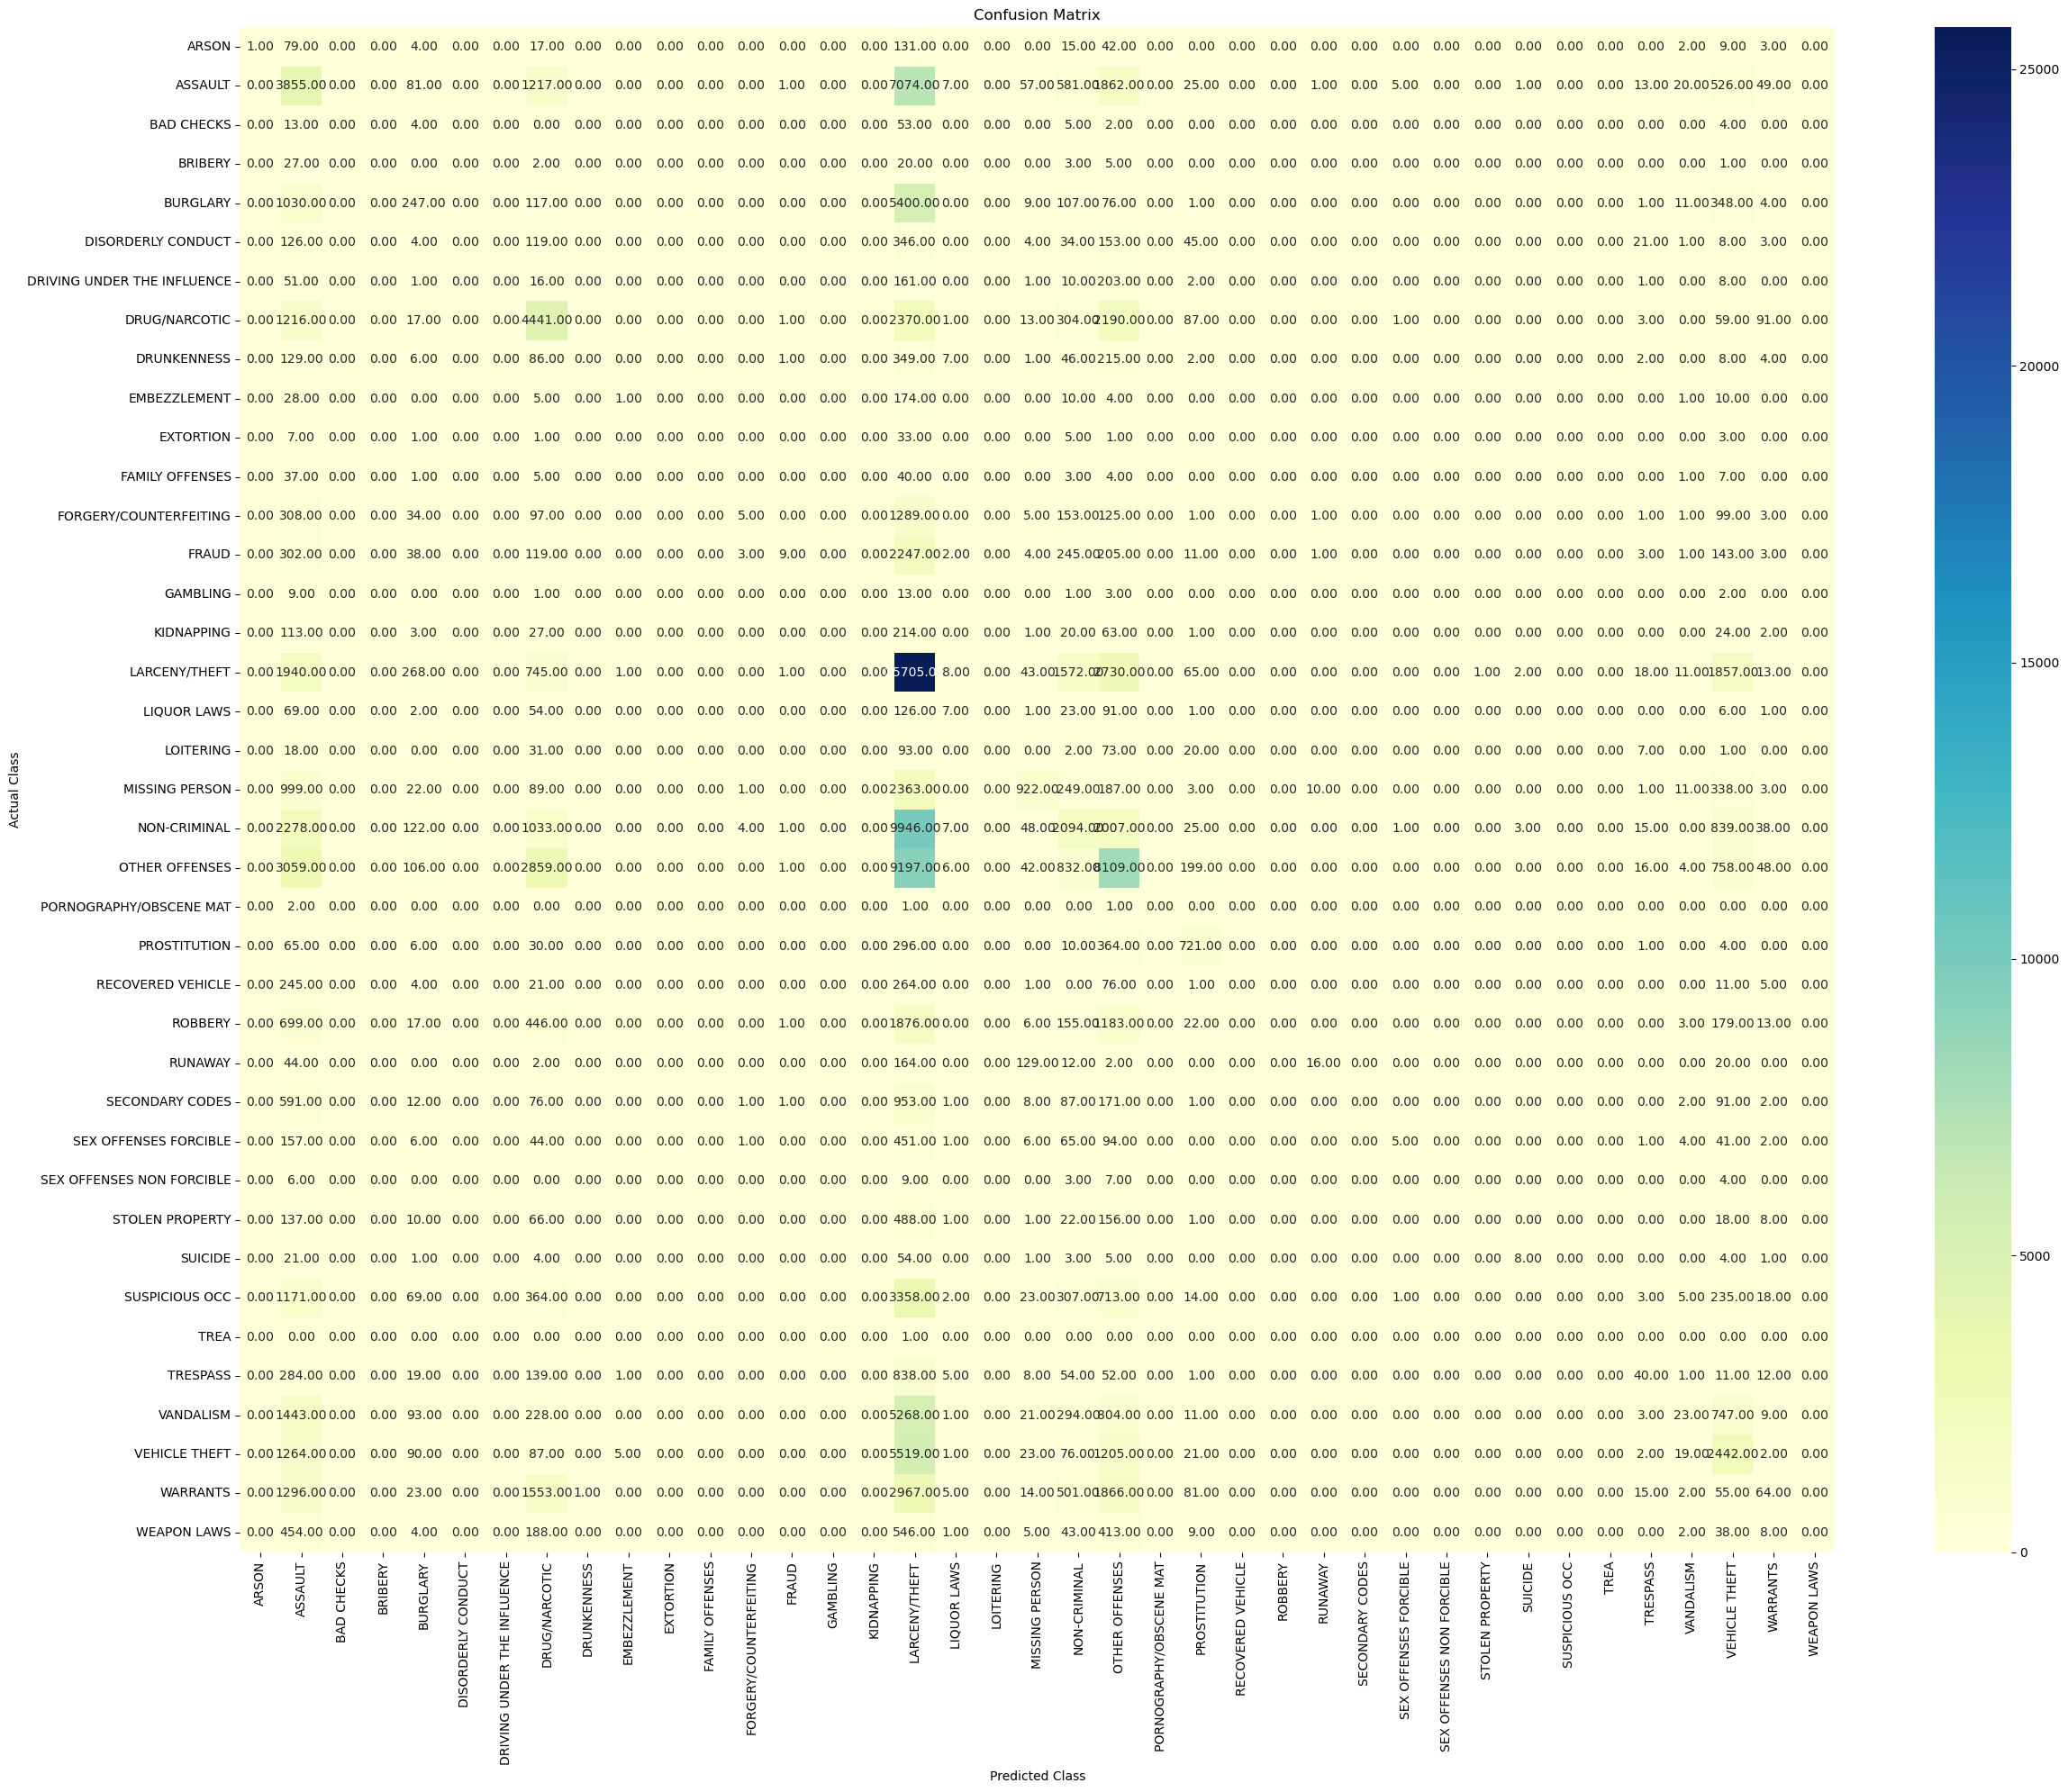

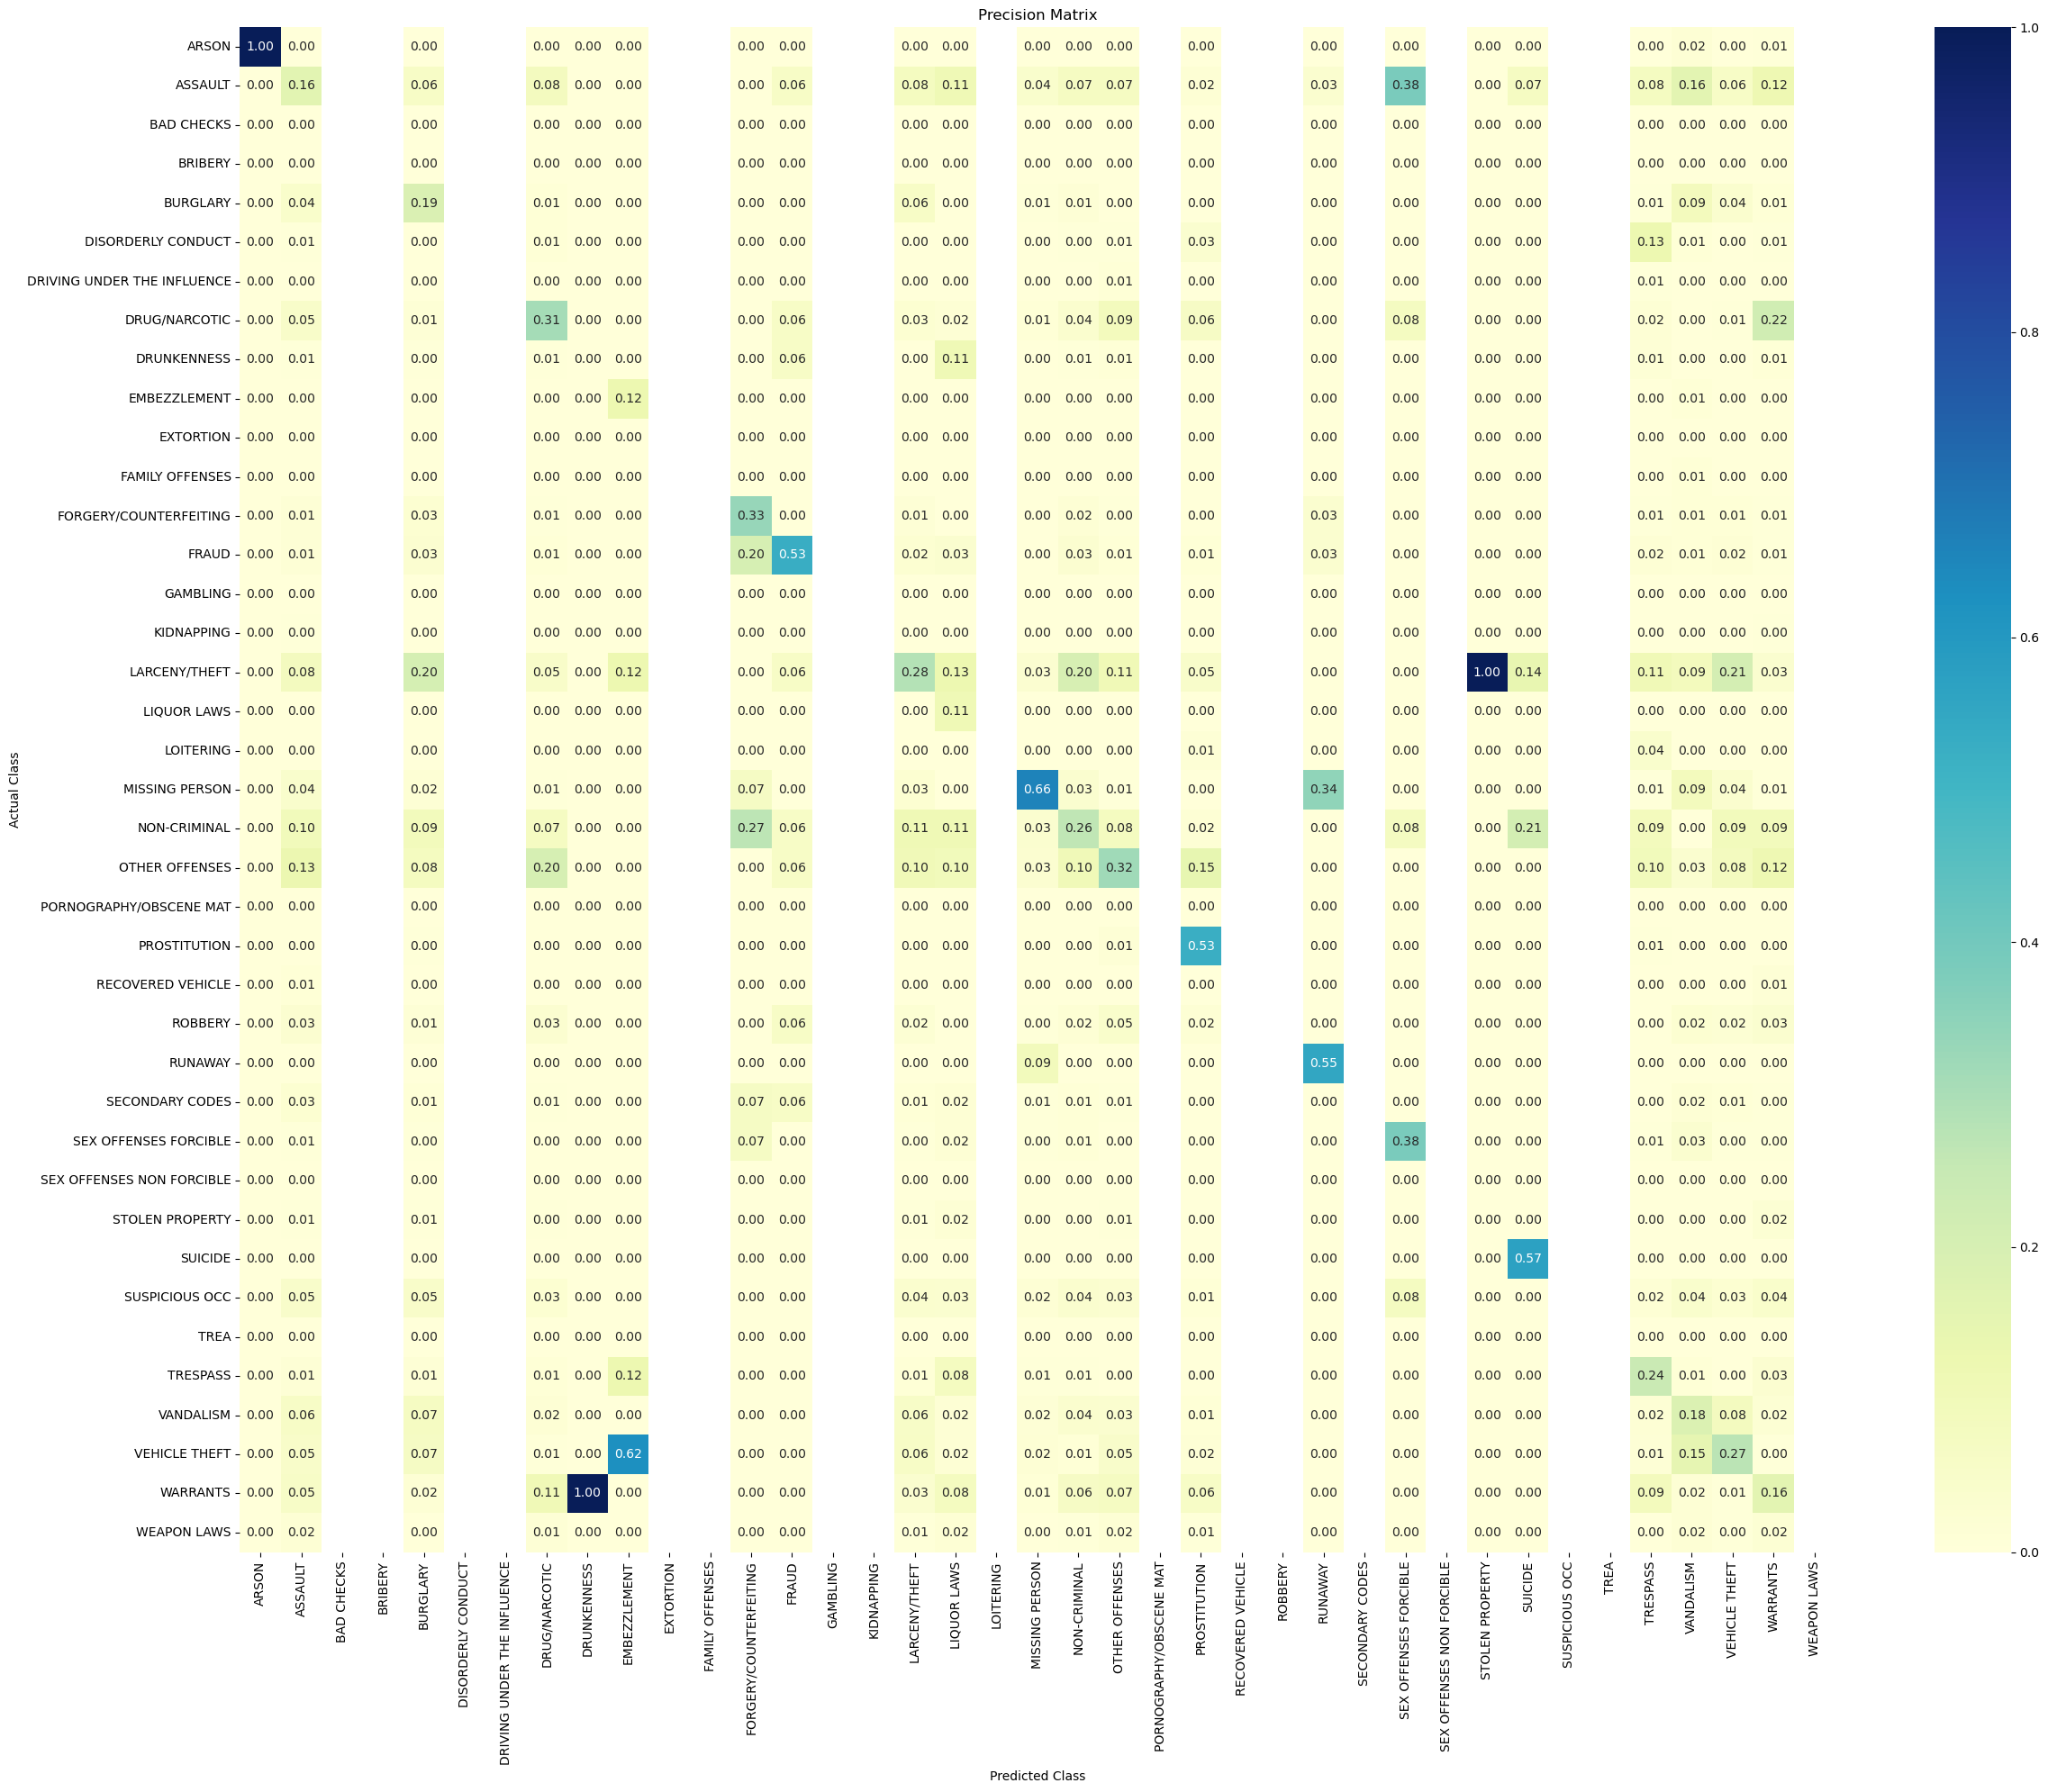

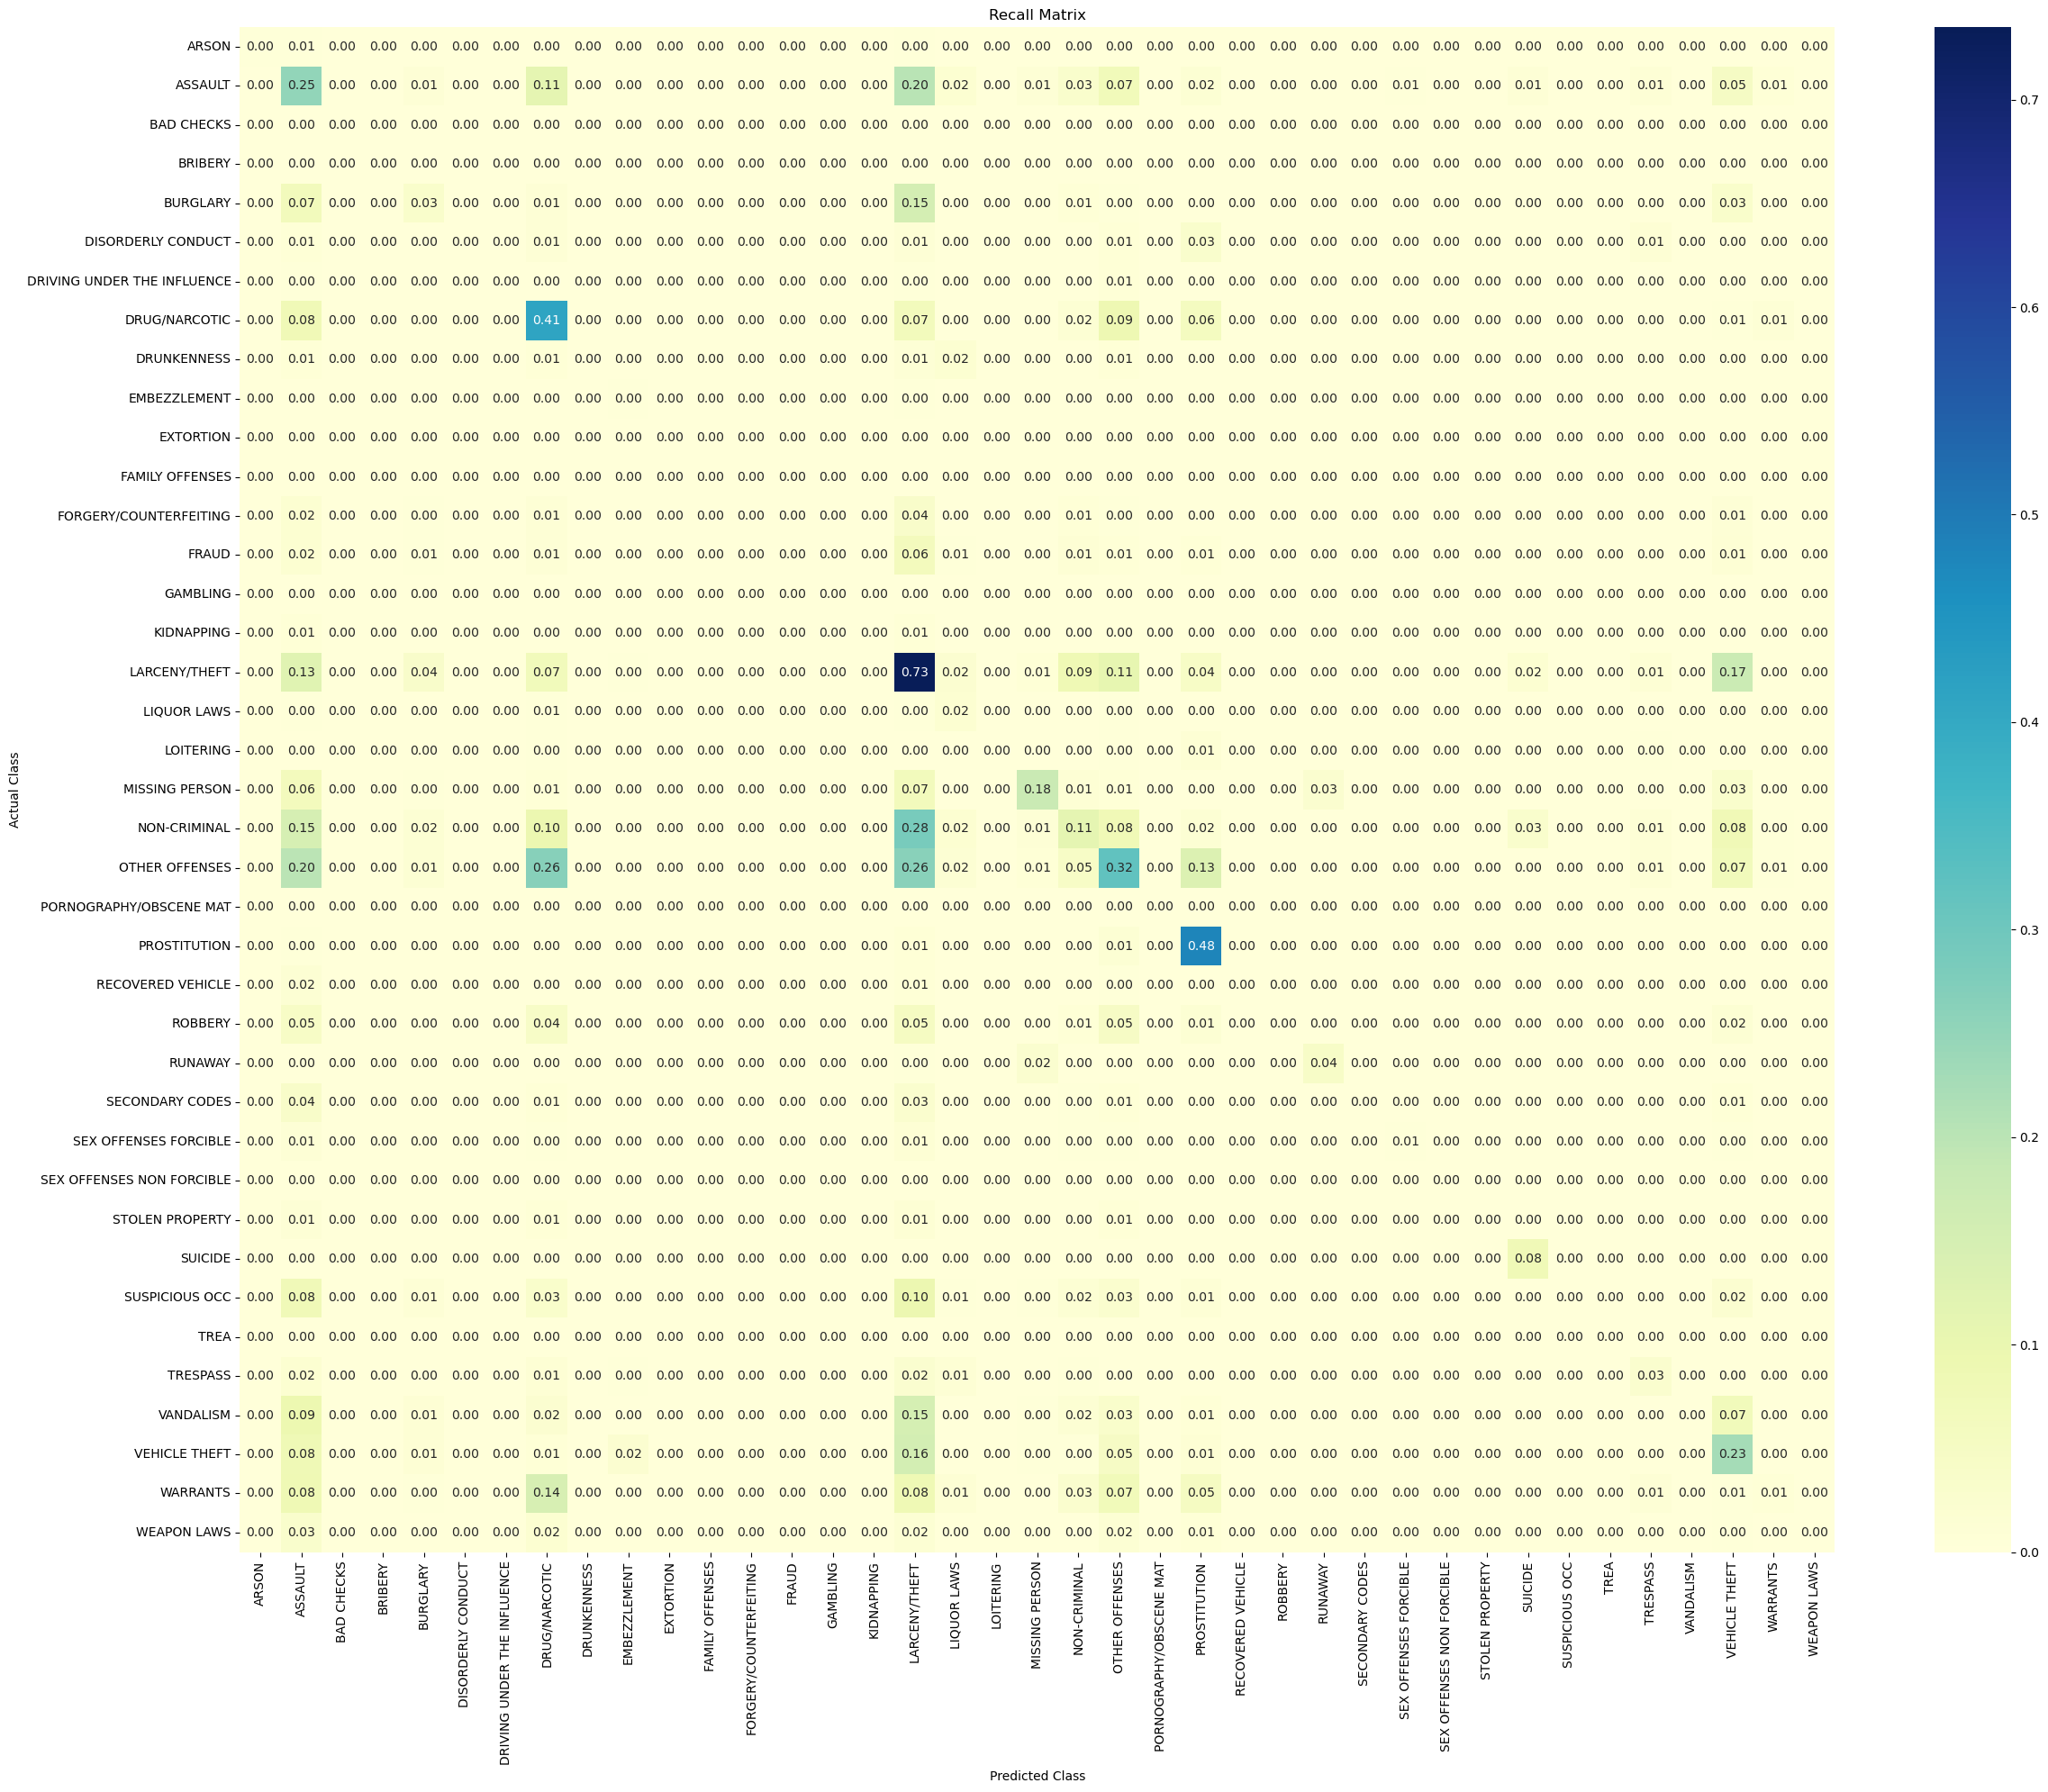

                             precision    recall  f1-score   support

                      ARSON       1.00      0.00      0.01       303
                    ASSAULT       0.16      0.25      0.20     15375
                 BAD CHECKS       0.00      0.00      0.00        81
                    BRIBERY       0.00      0.00      0.00        58
                   BURGLARY       0.19      0.03      0.06      7351
         DISORDERLY CONDUCT       0.00      0.00      0.00       864
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       454
              DRUG/NARCOTIC       0.31      0.41      0.35     10794
                DRUNKENNESS       0.00      0.00      0.00       856
               EMBEZZLEMENT       0.12      0.00      0.01       233
                  EXTORTION       0.00      0.00      0.00        51
            FAMILY OFFENSES       0.00      0.00      0.00        98
     FORGERY/COUNTERFEITING       0.33      0.00      0.00      2122
                      FRAUD      

In [57]:
rf_train_loss, rf_valid_loss, rf_test_loss = random_forest_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test)

XGBoost

In [58]:
def xgboost_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):
    model_path = 'models/'
    model_name = 'xgboost_multi_classifier.pkl'
    
    #le = LabelEncoder()
    #y_train_num = le.fit_transform(y_train)
    #y_test_num = le.fit_transform(y_test)

    if not os.path.isfile(path=model_path + model_name):
        clf = XGBClassifier(max_depth=8, n_estimators=150, objective='multi:softmax', tree_method='gpu_hist')
        clf.fit(X_train, y_train)

        # clf = CalibratedClassifierCV(clf, method='sigmoid')
        # clf.fit(X_train, y_train)
    
        pickle.dump(clf, open(model_path + model_name, 'wb'))
    else:
        print('Model already exists.')
        clf = pickle.load(open(model_path + model_name, 'rb'))

    y_train_preds = clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)
    
    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)

    return train_log_loss, valid_log_loss, test_log_loss

In [59]:
le = LabelEncoder()
y_train_num = le.fit_transform(y_train)
y_test_num = le.fit_transform(y_test)
y_valid_num = le.fit_transform(y_valid)

Model already exists.
Training Log Loss: 1.8992372884852824
Validation Log Loss: 1.8998527271489642
Testing Log Loss: 1.9003175744131526


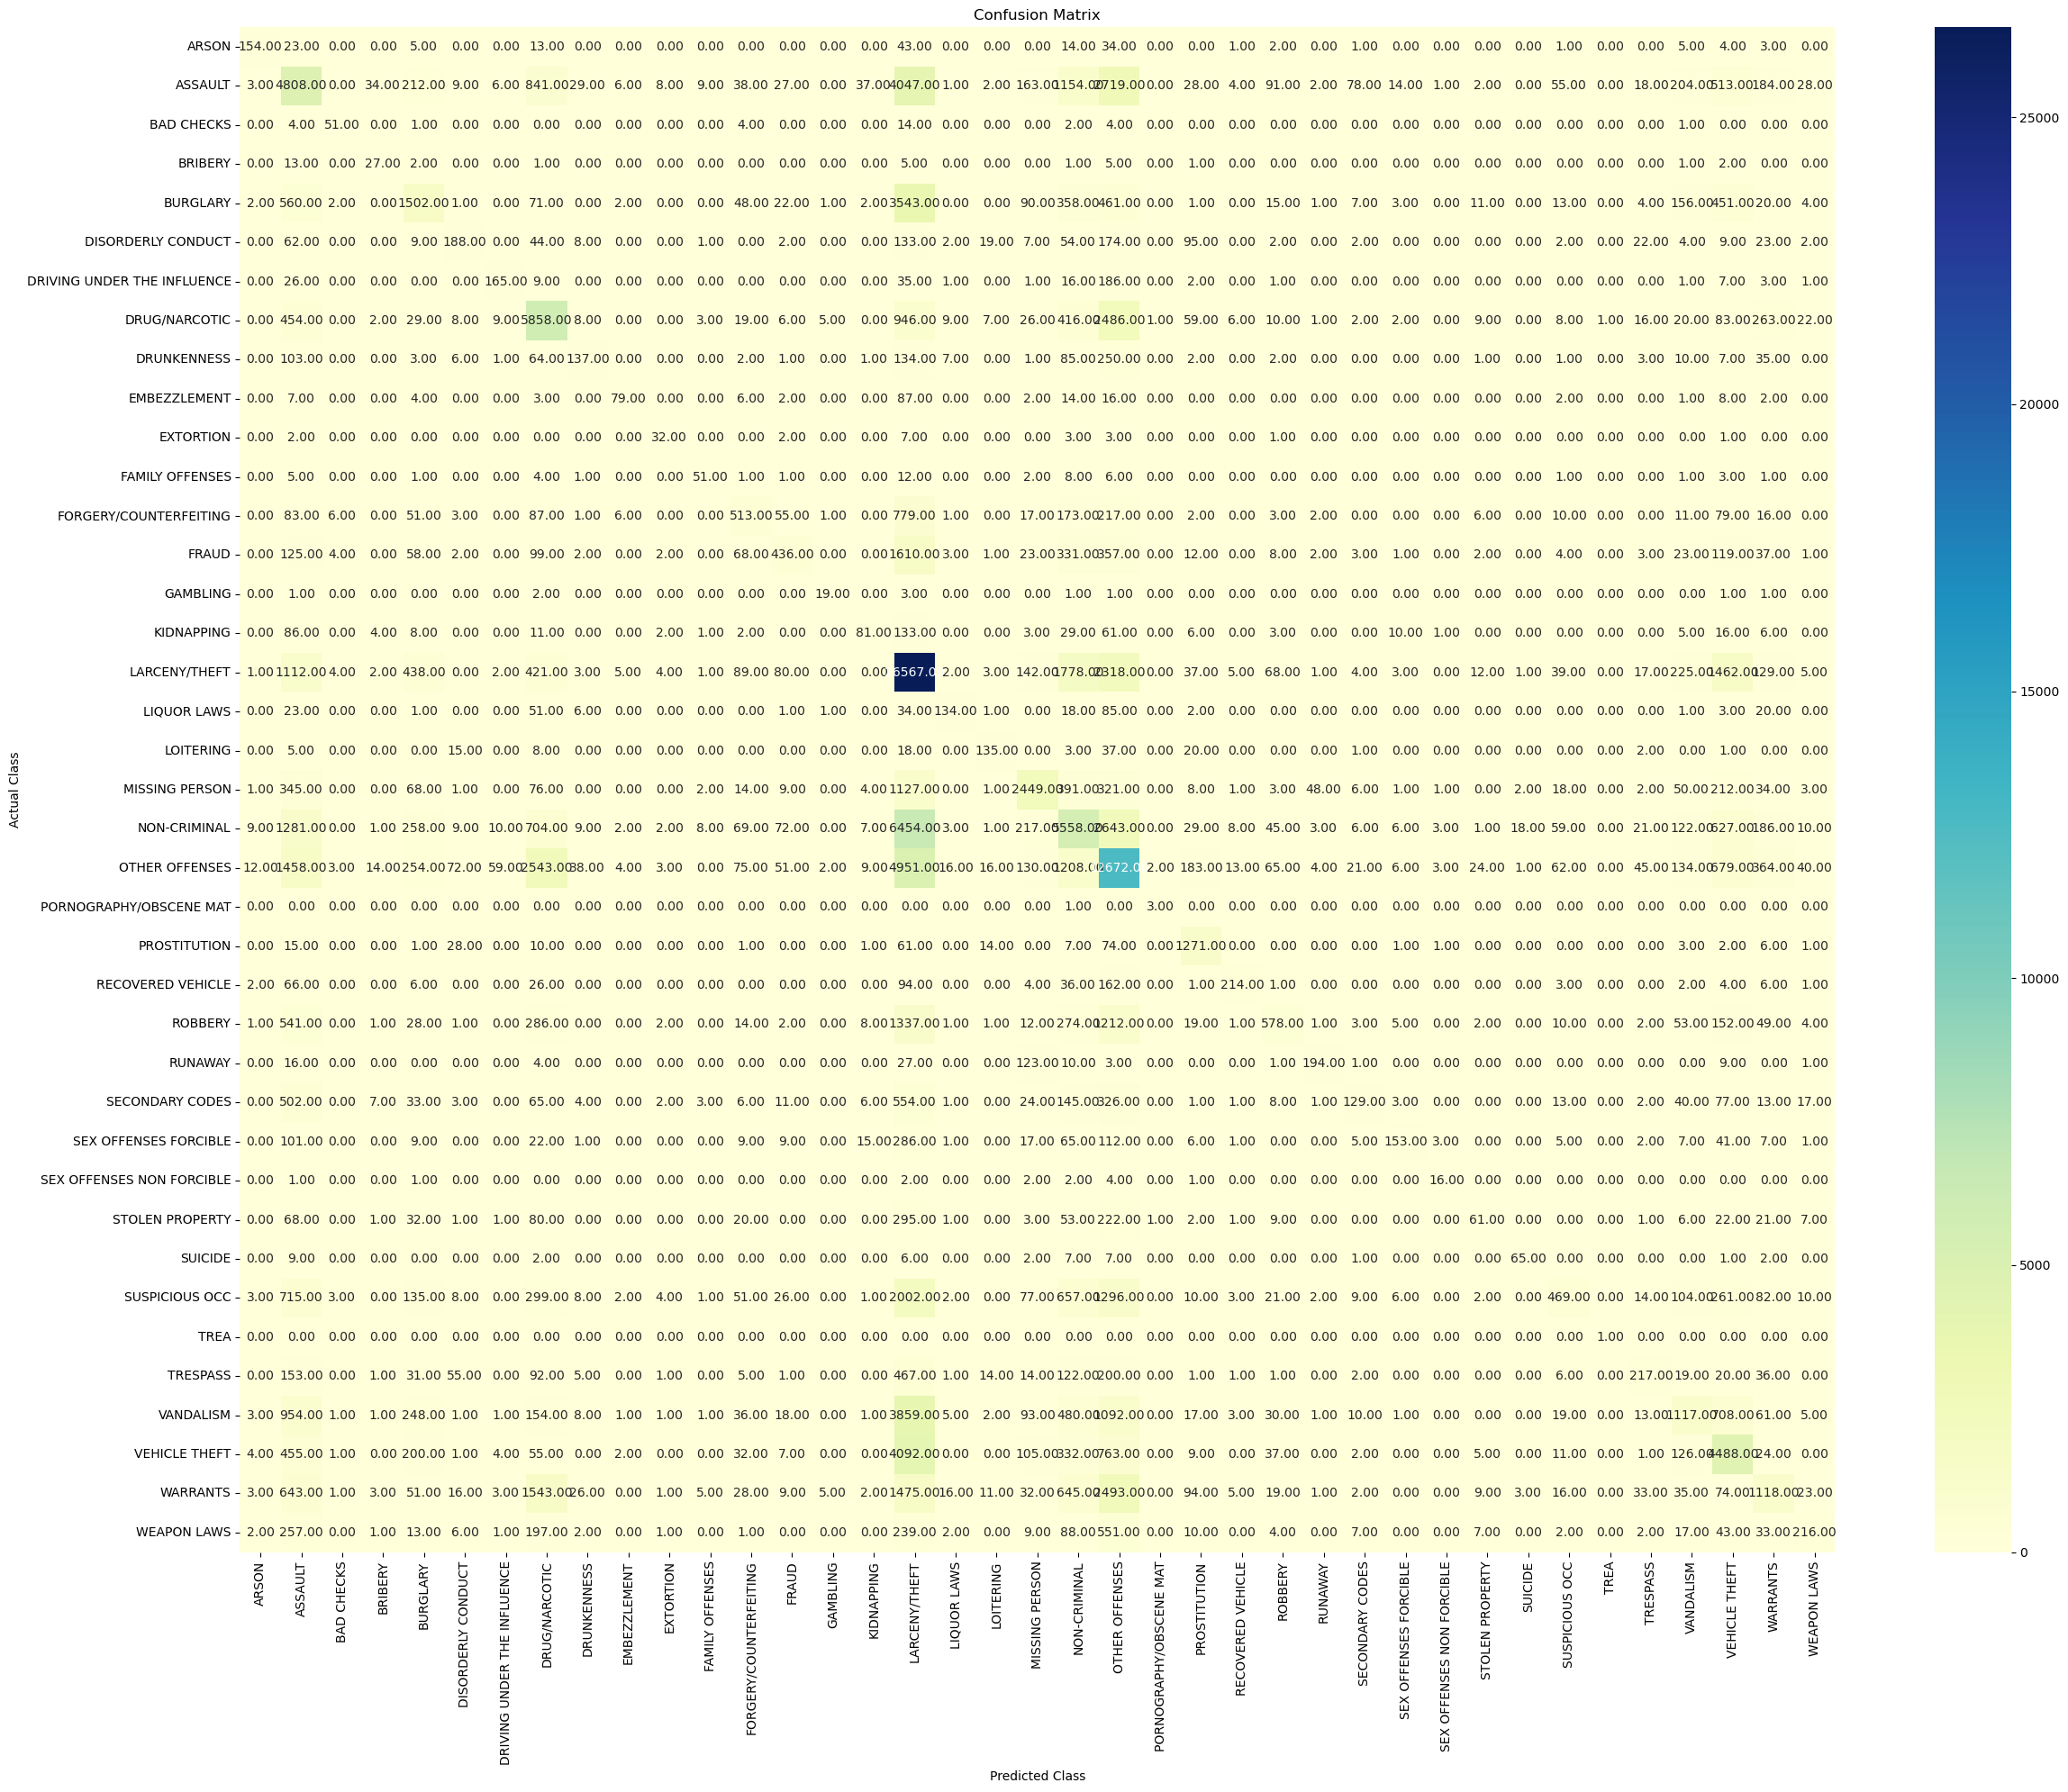

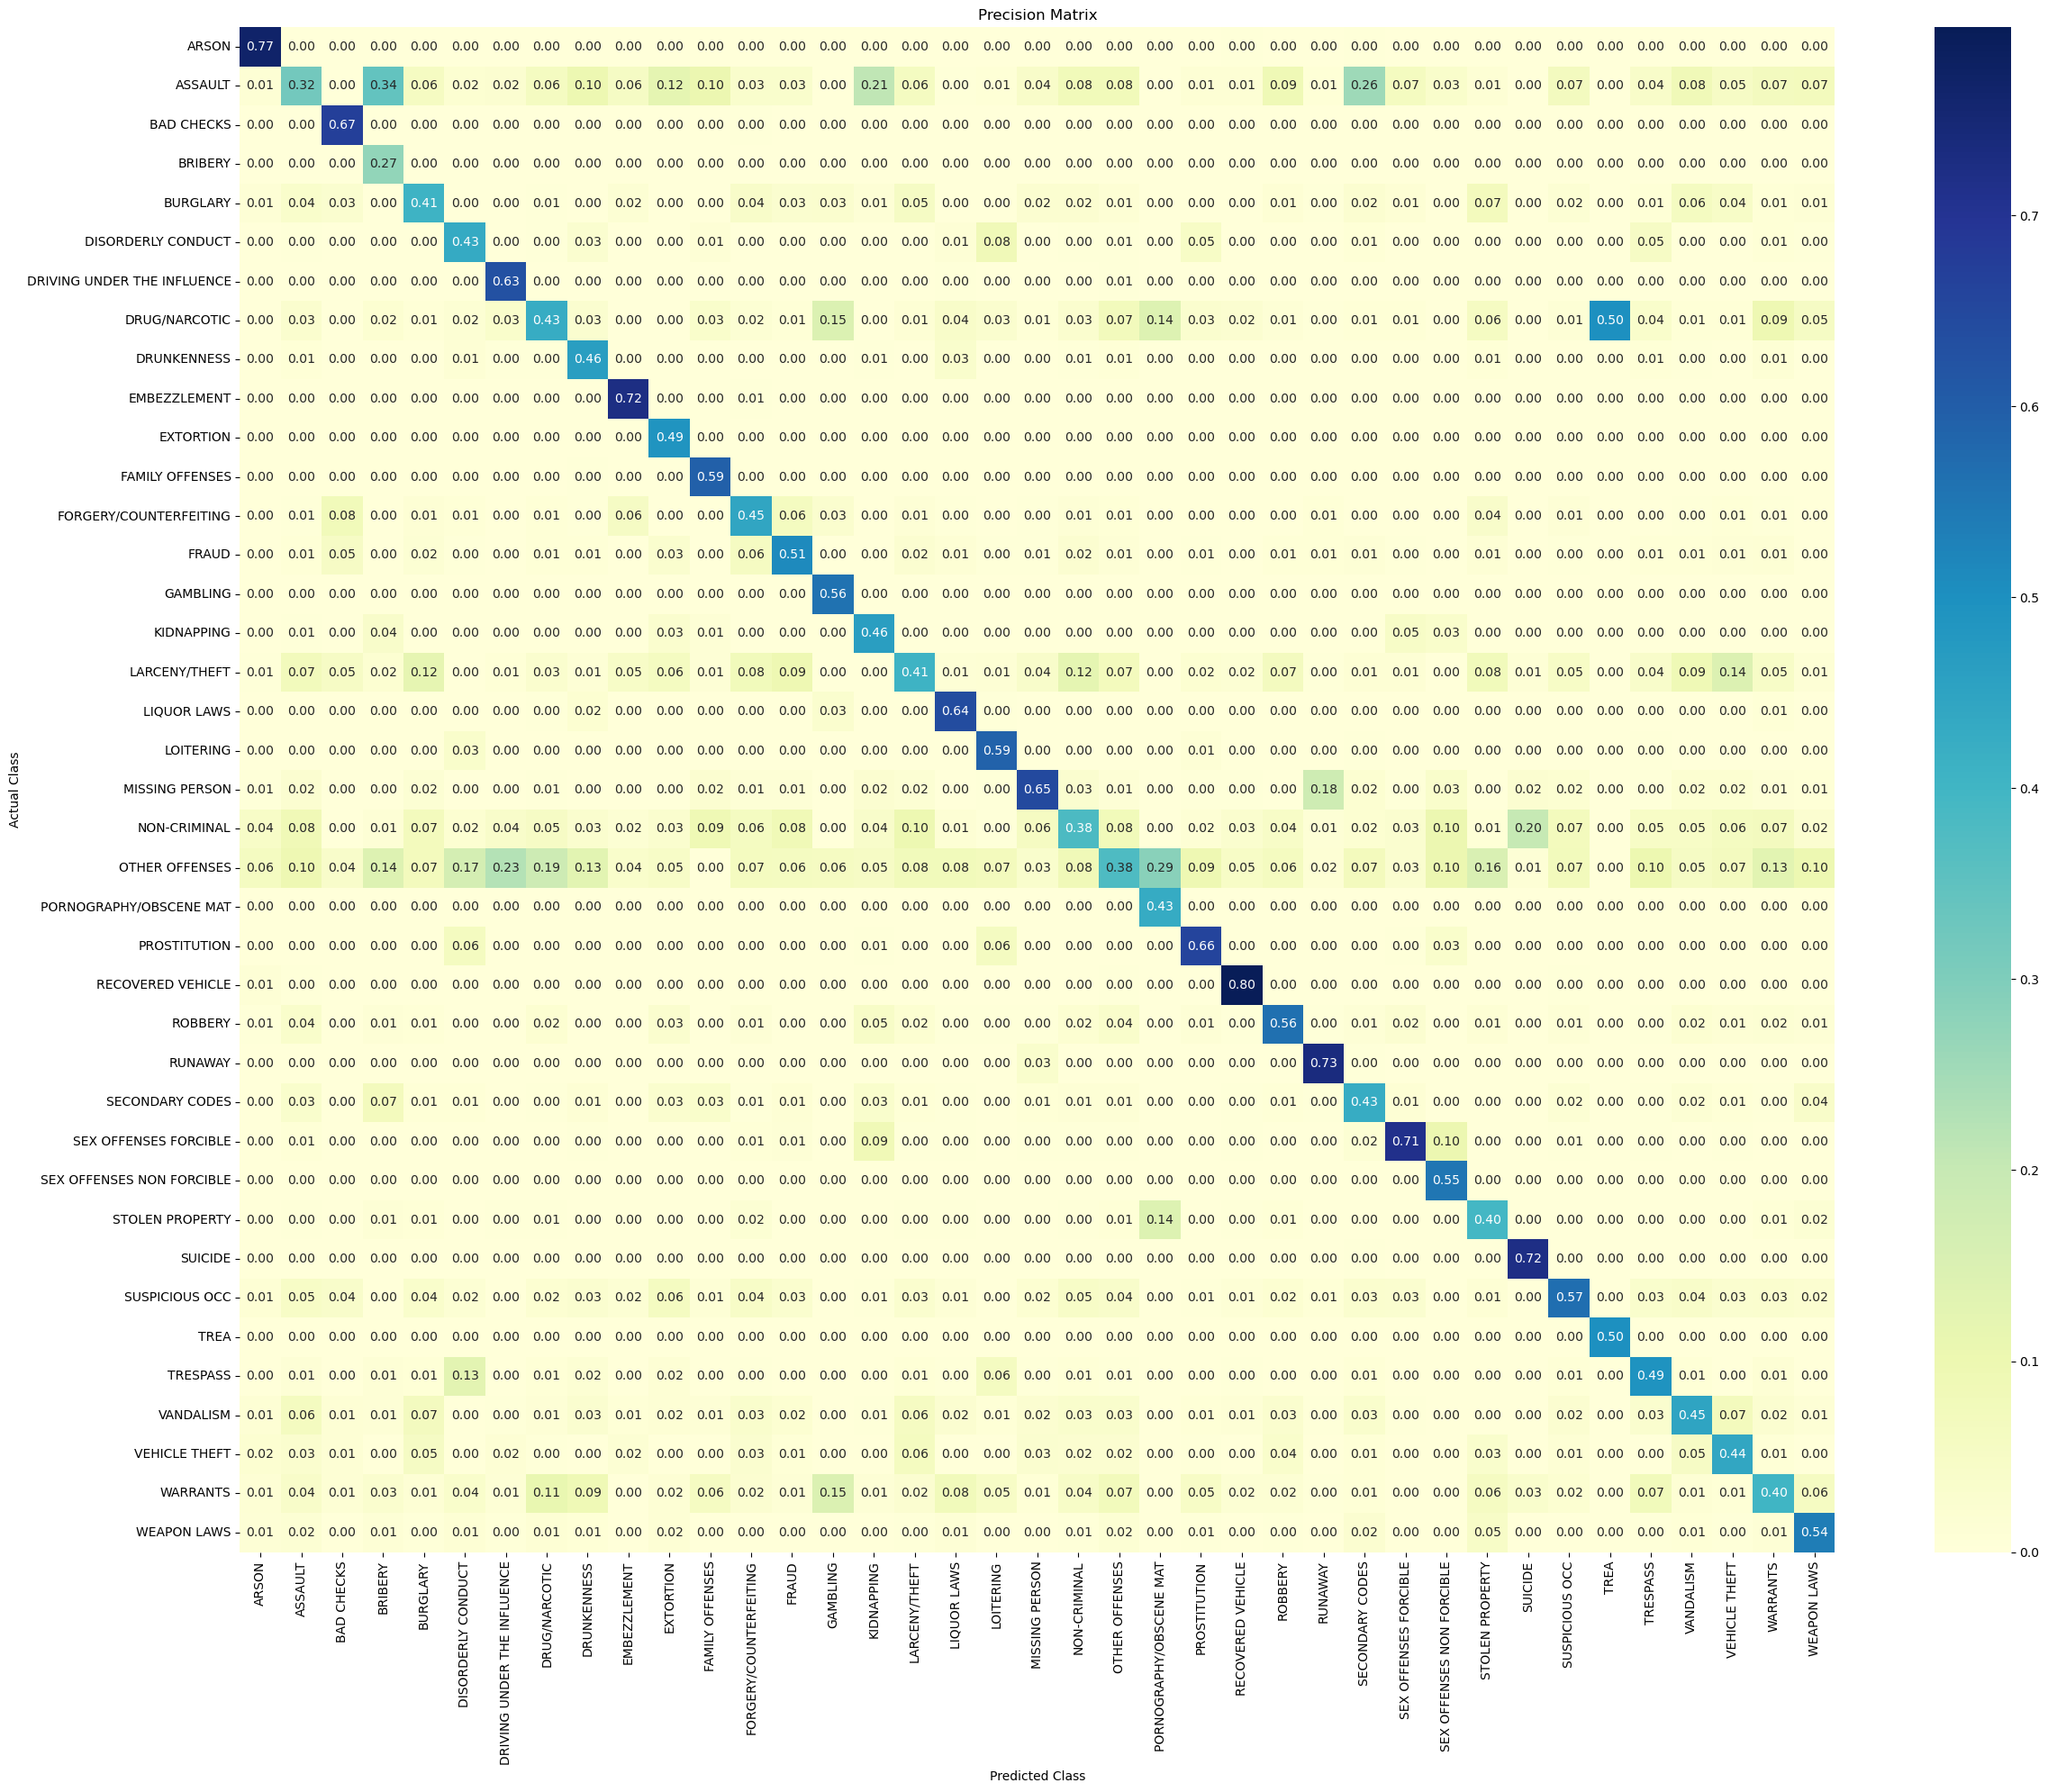

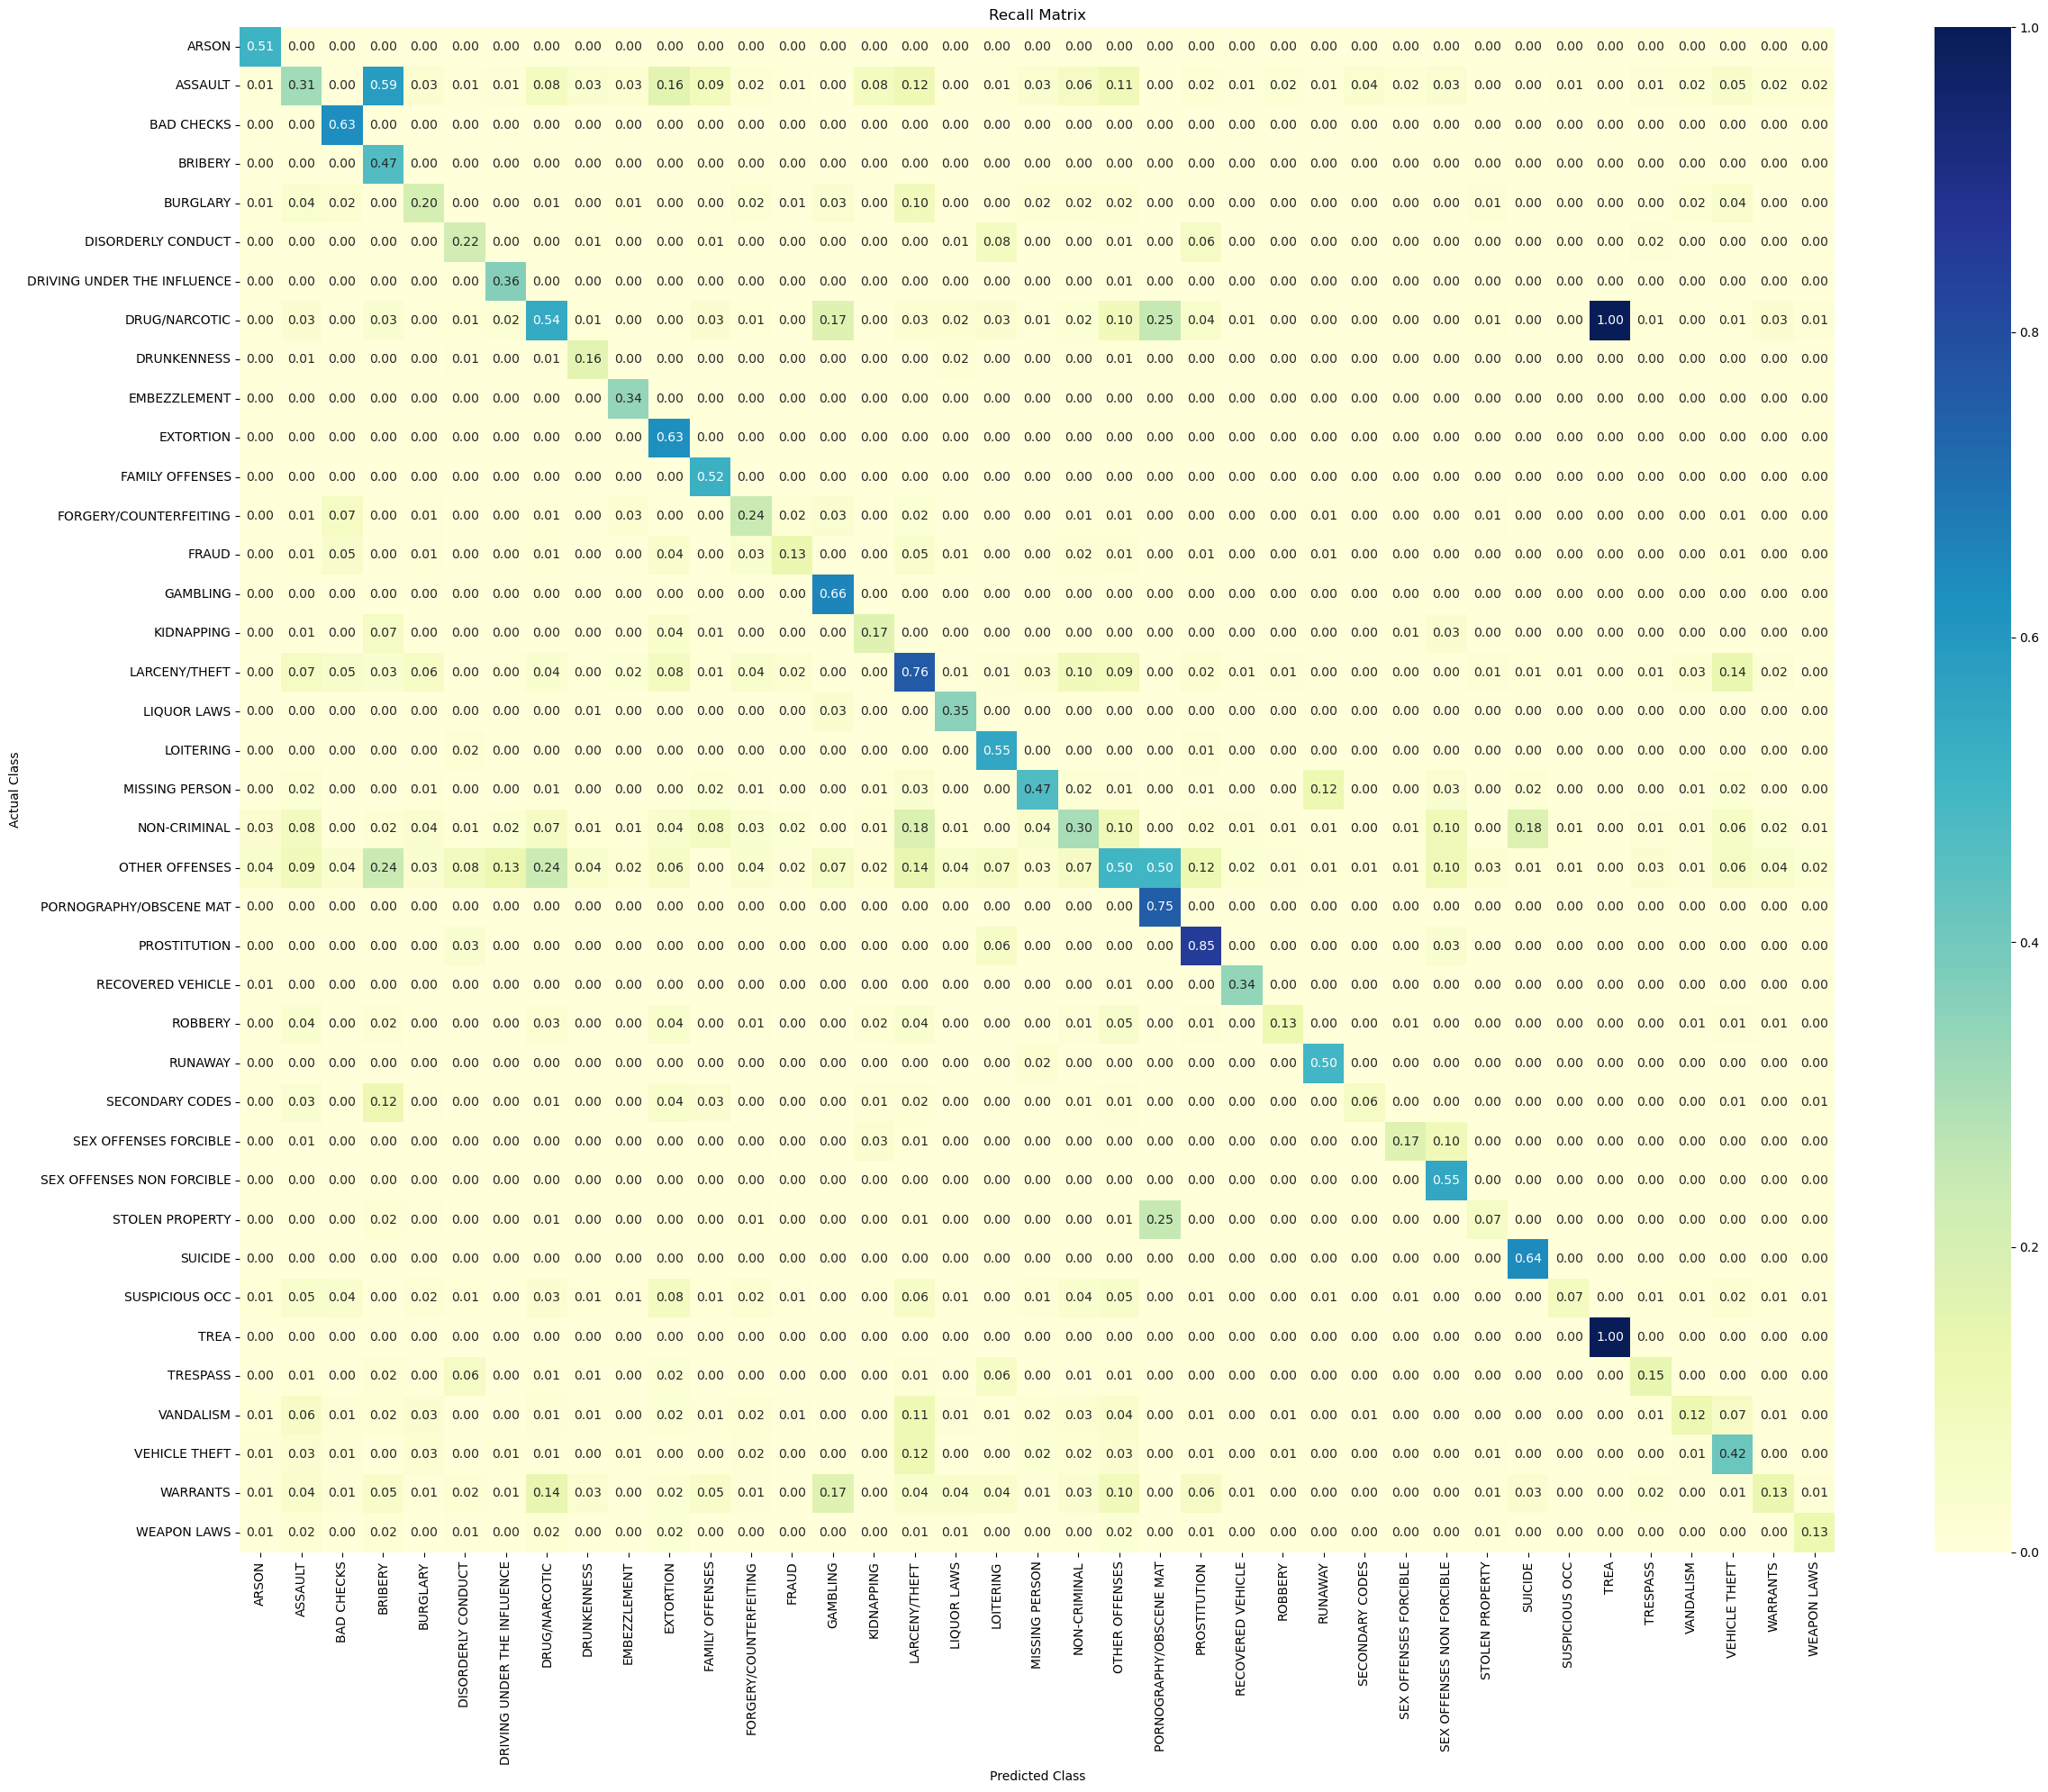

              precision    recall  f1-score   support

           0       0.77      0.51      0.61       303
           1       0.32      0.31      0.32     15375
           2       0.67      0.63      0.65        81
           3       0.27      0.47      0.34        58
           4       0.41      0.20      0.27      7351
           5       0.43      0.22      0.29       864
           6       0.63      0.36      0.46       454
           7       0.43      0.54      0.48     10794
           8       0.46      0.16      0.24       856
           9       0.72      0.34      0.46       233
          10       0.49      0.63      0.55        51
          11       0.59      0.52      0.55        98
          12       0.45      0.24      0.31      2122
          13       0.51      0.13      0.21      3336
          14       0.56      0.66      0.60        29
          15       0.46      0.17      0.25       468
          16       0.41      0.76      0.53     34980
          17       0.64    

In [60]:
xgb_train_loss, xgb_valid_loss, xgb_test_loss = xgboost_classifier(X_train, y_train_num, X_valid, y_valid_num, X_test, y_test_num)

Summary

In [61]:
model_names = ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'RandomForest', 'XGBoost Classifier']
train_losses = [dummy_train_loss, lr_train_loss, dt_train_loss, rf_train_loss, xgb_train_loss]
valid_losses = [dummy_valid_loss, lr_valid_loss, dt_valid_loss, rf_valid_loss, xgb_valid_loss]
test_losses = [dummy_test_loss, lr_test_loss, dt_test_loss, rf_test_loss, xgb_test_loss]

summary_df = pd.DataFrame()
summary_df['Models'] = model_names
summary_df['Train Loss'] = train_losses
summary_df['Valid Loss'] = valid_losses
summary_df['Test Loss'] = test_losses

summary = tabulate(tabular_data=summary_df, headers='keys', tablefmt='psql')
print(summary)

+----+---------------------+--------------+--------------+-------------+
|    | Models              |   Train Loss |   Valid Loss |   Test Loss |
|----+---------------------+--------------+--------------+-------------|
|  0 | Dummy Classifier    |      2.68033 |      2.68034 |     2.6803  |
|  1 | Logistic Regression |      2.49143 |      2.49011 |     2.4928  |
|  2 | Decision Tree       |      2.34089 |      2.34039 |     2.33929 |
|  3 | RandomForest        |      2.39458 |      2.39245 |     2.39573 |
|  4 | XGBoost Classifier  |      1.89924 |      1.89985 |     1.90032 |
+----+---------------------+--------------+--------------+-------------+


## 